# Design CTP-14 human genome 5kb library 

for neurexin1

by Pu Zheng

2022.10.14


# Table of contents


> 0. [Minimum required packages and settings](#0)
>>
>> 0.1: [import required packages](#0.1)
>
> 1. [Extract region sequences](#1)

<a id='0'></a>
# 0 Minimum required packages and settings

<a id='0.1'></a>
## 0.1 load required packages

In [81]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

# library design specific tools
from ImageAnalysis3.library_tools import LibraryDesigner as ld
from ImageAnalysis3.library_tools import LibraryTools as lt
# biopython imports
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIXML

6372


<a id='1'></a>
# 1 Extract region sequences

In [2]:
## Some folders
# human genome
reference_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38'
genome_folder = os.path.join(reference_folder, 'Genome')
# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain'
if not os.path.exists(pool_folder):
    print(f"Create pool_folder: {pool_folder}")
    os.makedirs(pool_folder)
else:
    print(f"Use pool_folder: {pool_folder}")

Use pool_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain


In [23]:
# folder for sub-pool
library_folder = os.path.join(pool_folder, f'human_NRNX1_5kb')
if not os.path.exists(library_folder):
    print(f"create library folder: {library_folder}")
    os.makedirs(library_folder)
# folder for fasta sequences
sequence_folder = os.path.join(library_folder, 'sequences')
if not os.path.exists(sequence_folder):
    print(f"create sequence folder: {sequence_folder}")
    os.makedirs(sequence_folder)
# folder to save result probes
report_folder = os.path.join(library_folder, 'reports')
if not os.path.exists(report_folder):
    print(f"create report folder: {report_folder}")
    os.makedirs(report_folder)
    
print(f"-- library_folder: {library_folder}")
print(f"-- sequence_folder: {sequence_folder}")
print(f"-- report_folder: {report_folder}")

-- library_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb
-- sequence_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences
-- report_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\reports


<a id='1.1'></a>
## 1.1 select regions

In [12]:
# prepare sequence reader
reload(ia.library_tools.sequences)
resolution = 5000
flanking = 0

seq_rd = ia.library_tools.sequences.sequence_reader(genome_folder, resolution=resolution, flanking=flanking)
seq_rd.load_ref_sequences() # load genomic sequences

-- load sequence: 1, size=248956422
-- load sequence: 10, size=133797422
-- load sequence: 11, size=135086622
-- load sequence: 12, size=133275309
-- load sequence: 13, size=114364328
-- load sequence: 14, size=107043718
-- load sequence: 15, size=101991189
-- load sequence: 16, size=90338345
-- load sequence: 17, size=83257441
-- load sequence: 18, size=80373285
-- load sequence: 19, size=58617616
-- load sequence: 2, size=242193529
-- load sequence: 20, size=64444167
-- load sequence: 21, size=46709983
-- load sequence: 22, size=50818468
-- load sequence: 3, size=198295559
-- load sequence: 4, size=190214555
-- load sequence: 5, size=181538259
-- load sequence: 6, size=170805979
-- load sequence: 7, size=159345973
-- load sequence: 8, size=145138636
-- load sequence: 9, size=138394717
-- load sequence: MT, size=16569
-- load sequence: X, size=156040895
-- load sequence: Y, size=57227415
-- load sequence: KI270728.1, size=1872759
-- load sequence: KI270727.1, size=448248
-- load seque

<a id='1.2'></a>
## 1.2 manually input region information

In [15]:
region_dicts = [
    {
        'Chr': '2',
        'Start':'48000001',
        'End':'51500000',
        'Region':f"2:48000001-51500000",
        'Strand':'+',
        'Gene': f"NRNX1",
    }
]

In [16]:
seqs = seq_rd.find_sequence_for_region(region_dicts)

-- searching among 1 references
-- a match found in record: 2.


In [24]:
seq_rd.save_sequences(save_folder=sequence_folder)

-- saving sequences into folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-0.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-2.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-3.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-4.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-5.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_hu

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-139.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-140.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-141.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-142.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-143.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-144.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-145.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Lib

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-283.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-284.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-285.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-286.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-287.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-288.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-289.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Lib

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-427.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-428.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-429.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-430.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-431.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-432.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-433.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Lib

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-572.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-573.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-574.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-575.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-576.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-577.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-578.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Lib

<a id='2'></a>
# 2. Design probe targeting sequences by probe_designer

run probe_designer, remeber to clear the memory usage because each table should take ~32GB

<a id='2.1'></a>
## 2.1 Construct count table with all the 17-mers in the genome

Only do this if you don't have pre-built 17-mer

However you can do almost the same thing for your own library during quality check

This library requires hg38 genome

In [18]:
overwrite_table = False

### construct map for whole genome

In [19]:
from ImageAnalysis3 import library_tools

In [52]:
reload(library_tools.design)
 
genome_table_file = os.path.join(reference_folder, 'hg38_genome_17w.npy')

if not os.path.exists(genome_table_file) or overwrite_table:
    # genome
    _genome_filenames = [os.path.join(genome_folder, _fl) 
         for _fl in os.listdir(genome_folder) 
         if _fl.split(os.extsep)[-1]=='fasta' or _fl.split(os.extsep)[-1]=='fa']
    print(len(_genome_filenames))

    ct = library_tools.design.countTable(word=17,save_file=genome_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_genome_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()

    # clear RAM if contructed countable 
    del(ct)
else:
    print(f"reference table: {genome_table_file} already exist, skip.")

reference table: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38\hg38_genome_17w.npy already exist, skip.


### construct map for transcriptome

In [53]:
from tqdm import tqdm
# transcriptome
transcriptome_folder = os.path.join(reference_folder, 'Transcriptome')

transcriptome_table_file = os.path.join(reference_folder, 'hg38_transcriptome_17w.npy')

if not os.path.exists(transcriptome_table_file) or overwrite_table:
    # transcriptome
    _transcriptome_filenames = [os.path.join(transcriptome_folder, _fl) 
         for _fl in os.listdir(transcriptome_folder) 
         if _fl.split(os.extsep)[-1]=='fasta' or _fl.split(os.extsep)[-1]=='fa']
    print(len(_transcriptome_filenames))
    
    ct = library_tools.design.countTable(word=17,save_file=transcriptome_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_transcriptome_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()
    
    # clear RAM if contructed countable 
    del(ct)
else:
    print(f"reference table: {transcriptome_table_file} already exist, skip.")

reference table: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38\hg38_transcriptome_17w.npy already exist, skip.


### construct map for repeats from RepBase

In [54]:
from tqdm import tqdm
# repeat
repeat_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\Repbase'

repeat_table_file = os.path.join(reference_folder, 'Repbase_v2603_repeat_17w.npy')

if not os.path.exists(repeat_table_file) or overwrite_table:
    # repeat
    _repeat_filenames = [os.path.join(repeat_folder, _fl) 
         for _fl in os.listdir(repeat_folder) 
         if _fl.split(os.extsep)[-1]=='fasta' or _fl.split(os.extsep)[-1]=='fa']
    print(len(_repeat_filenames))
    
    ct = library_tools.design.countTable(word=17,save_file=repeat_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_repeat_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()
    
    # clear RAM if contructed countable 
    del(ct)
else:
    print(f"reference table: {repeat_table_file} already exist, skip.")

reference table: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38\Repbase_v2603_repeat_17w.npy already exist, skip.


<a id='2.2'></a>
## 2.2 Design probes

In [22]:
sequence_folder

'\\\\10.245.74.212\\Chromatin_NAS_2\\Chromatin_Libraries\\CTP-14_human_brain\\mouse_long_5kb\\sequences'

In [25]:
from ImageAnalysis3 import library_tools
# requires pre_defined genome_folder and library_folder
# Indices
genome_index = os.path.join(reference_folder, 'hg38_genome_17w.npy')
transcriptome_index = os.path.join(reference_folder, 'hg38_transcriptome_17w.npy') 
repeat_index = os.path.join(reference_folder, 'Repbase_v2603_repeat_17w.npy')
#ref_merfish_index = os.path.join(reference_folder, 'M1_meng_MERFISH_17w.npy') # merfish designed by Meng
# get input files 
input_files = glob.glob(os.path.join(sequence_folder, '*.fasta'))

print(f"{len(input_files)} regions loaded to design probes.")

if not os.path.exists(report_folder):
    os.makedirs(report_folder)
    
# filename to save probe reports
probe_savefile = os.path.join(report_folder, f'NRNX1_5kb.pbr')
print(probe_savefile)

700 regions loaded to design probes.
\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\reports\NRNX1_5kb.pbr


### create pb_designer class

In [26]:
reload(library_tools)
reload(library_tools.design)

pb_designer = library_tools.design.pb_reports_class(
    sequence_dic={'file':input_files,
                  'rev_com':True, # design two strands
                  'two_stranded':True},
    map_dic={'genome':{'file':genome_index,'rev_com':False,'two_stranded':True},
             #'transcriptome':{'file':transcriptome_index,'rev_com':True,'two_stranded':False},
             'rep_genome':{'file':repeat_index,'rev_com':False,'two_stranded':True},
             'self_sequences':{'file':input_files,'force_list':True,'rev_com':False,'two_stranded':True},
             #'ref_merfish':{'file':ref_merfish_index,'rev_com':False,'two_stranded':True},
             },
        save_file=probe_savefile,
    params_dic={'word_size':17,'pb_len':42,'buffer_len':0,'max_count':2**16-1,
                'check_on_go': False, # whether automatically check probes
                'auto': False, # whether automatically convert reference maps
               },
    check_dic={('genome','self_sequences'): 50, # 25
               'rep_genome': 0,
               #'transcriptome': 25, # 14
               #'ref_merfish': 14,
               'gc':[0.25,0.85],'tm': 37+0.62*50+5,
               }
    )
print(pb_designer)
pb_designer.load_from_file(load_probes_only=True)


Probe designer derived from Bogdan Bintu:
https://github.com/BogdanBintu/ChromatinImaging/blob/master/LibraryDesign/LibraryDesigner.py
by Pu Zheng, 2020.11

Major changes:
    1. allow design of two strands
    2. separate reverse_complement (rev_com) and from two strands (two_stranded) as 
    two different inputs for map_dic and sequence_dic
    3. replace 'local_genome' with 'self_sequences' to be more explicit, and only 
    exclude the counts for the corresponding self_sequence within each input. 

Key information:
    - number of input_sequence(s): 700
    - save_file location: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\reports\NRNX1_5kb.pbr

- Fail to load from savefile: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\reports\NRNX1_5kb.pbr, file doesn't exist.


False

### calculate probe reports

In [27]:
%%time
pb_designer.computeOTmaps() # load the tables 
pb_designer.compute_pb_report() # design candidate probes

-- setting attribute: map_genome
--- finish map_genome in 74.490s.
-- setting attribute: map_rep_genome
--- finish map_rep_genome in 83.684s.
Time(s): 158.17513370513916
- Designing targeting sequence for 700 regions
-- designing region: 2:48000000-48005000_strand_+_gene_NRNX1-seg-1 -- region: 0, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-0.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.383s.
-- designing region: 2:48005000-48010000_strand_+_gene_NRNX1-seg-2 -- region: 1, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.199s.
- Designed 9918 candidate probes in 2.780s.
-- designing region: 2:48010000-48015000_strand_+_gene_NRNX1-seg-

- Designed 9918 candidate probes in 2.753s.
-- designing region: 2:48115000-48120000_strand_+_gene_NRNX1-seg-24 -- region: 23, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-23.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.763s.
-- designing region: 2:48120000-48125000_strand_+_gene_NRNX1-seg-25 -- region: 24, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-24.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.182s.
- Designed 9918 candidate probes in 2.755s.
-- designing region: 2:48125000-48130000_strand_+_gene_NRNX1-seg-26 -- region: 25, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-25.fasta
-- setting attribute:

- Designed 9918 candidate probes in 3.022s.
-- designing region: 2:48230000-48235000_strand_+_gene_NRNX1-seg-47 -- region: 46, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-46.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.186s.
- Designed 9918 candidate probes in 2.757s.
-- designing region: 2:48235000-48240000_strand_+_gene_NRNX1-seg-48 -- region: 47, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-47.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.185s.
- Designed 9918 candidate probes in 2.758s.
-- designing region: 2:48240000-48245000_strand_+_gene_NRNX1-seg-49 -- region: 48, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-48.fasta
-- setting attribute:

- Designed 9918 candidate probes in 2.753s.
-- designing region: 2:48345000-48350000_strand_+_gene_NRNX1-seg-70 -- region: 69, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-69.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.157s.
- Designed 9918 candidate probes in 2.734s.
-- designing region: 2:48350000-48355000_strand_+_gene_NRNX1-seg-71 -- region: 70, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-70.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.809s.
-- designing region: 2:48355000-48360000_strand_+_gene_NRNX1-seg-72 -- region: 71, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-71.fasta
-- setting attribute:

- Designed 9918 candidate probes in 2.755s.
-- designing region: 2:48460000-48465000_strand_+_gene_NRNX1-seg-93 -- region: 92, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-92.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.765s.
-- designing region: 2:48465000-48470000_strand_+_gene_NRNX1-seg-94 -- region: 93, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-93.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.181s.
- Designed 9918 candidate probes in 2.753s.
-- designing region: 2:48470000-48475000_strand_+_gene_NRNX1-seg-95 -- region: 94, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-94.fasta
-- setting attribute:

- Designed 9918 candidate probes in 2.765s.
-- designing region: 2:48575000-48580000_strand_+_gene_NRNX1-seg-116 -- region: 115, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-115.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.184s.
- Designed 9918 candidate probes in 2.758s.
-- designing region: 2:48580000-48585000_strand_+_gene_NRNX1-seg-117 -- region: 116, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-116.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.180s.
- Designed 9918 candidate probes in 2.757s.
-- designing region: 2:48585000-48590000_strand_+_gene_NRNX1-seg-118 -- region: 117, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-117.fasta
-- setting a

- Designed 9918 candidate probes in 2.762s.
-- designing region: 2:48690000-48695000_strand_+_gene_NRNX1-seg-139 -- region: 138, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-138.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.764s.
-- designing region: 2:48695000-48700000_strand_+_gene_NRNX1-seg-140 -- region: 139, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-139.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.186s.
- Designed 9918 candidate probes in 2.765s.
-- designing region: 2:48700000-48705000_strand_+_gene_NRNX1-seg-141 -- region: 140, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-140.fasta
-- setting a

- Designed 9918 candidate probes in 2.766s.
-- designing region: 2:48805000-48810000_strand_+_gene_NRNX1-seg-162 -- region: 161, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-161.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.185s.
- Designed 9918 candidate probes in 2.761s.
-- designing region: 2:48810000-48815000_strand_+_gene_NRNX1-seg-163 -- region: 162, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-162.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.181s.
- Designed 9918 candidate probes in 2.758s.
-- designing region: 2:48815000-48820000_strand_+_gene_NRNX1-seg-164 -- region: 163, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-163.fasta
-- setting a

- Designed 9918 candidate probes in 3.648s.
-- designing region: 2:48920000-48925000_strand_+_gene_NRNX1-seg-185 -- region: 184, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-184.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.184s.
- Designed 9918 candidate probes in 2.760s.
-- designing region: 2:48925000-48930000_strand_+_gene_NRNX1-seg-186 -- region: 185, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-185.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.768s.
-- designing region: 2:48930000-48935000_strand_+_gene_NRNX1-seg-187 -- region: 186, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-186.fasta
-- setting a

- Designed 9918 candidate probes in 2.760s.
-- designing region: 2:49035000-49040000_strand_+_gene_NRNX1-seg-208 -- region: 207, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-207.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.179s.
- Designed 9918 candidate probes in 2.752s.
-- designing region: 2:49040000-49045000_strand_+_gene_NRNX1-seg-209 -- region: 208, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-208.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.767s.
-- designing region: 2:49045000-49050000_strand_+_gene_NRNX1-seg-210 -- region: 209, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-209.fasta
-- setting a

- Designed 9918 candidate probes in 2.760s.
-- designing region: 2:49150000-49155000_strand_+_gene_NRNX1-seg-231 -- region: 230, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-230.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.763s.
-- designing region: 2:49155000-49160000_strand_+_gene_NRNX1-seg-232 -- region: 231, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-231.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.189s.
- Designed 9918 candidate probes in 2.760s.
-- designing region: 2:49160000-49165000_strand_+_gene_NRNX1-seg-233 -- region: 232, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-232.fasta
-- setting a

- Designed 9918 candidate probes in 2.759s.
-- designing region: 2:49265000-49270000_strand_+_gene_NRNX1-seg-254 -- region: 253, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-253.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.182s.
- Designed 9918 candidate probes in 2.757s.
-- designing region: 2:49270000-49275000_strand_+_gene_NRNX1-seg-255 -- region: 254, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-254.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.183s.
- Designed 9918 candidate probes in 2.755s.
-- designing region: 2:49275000-49280000_strand_+_gene_NRNX1-seg-256 -- region: 255, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-255.fasta
-- setting a

- Designed 9918 candidate probes in 2.766s.
-- designing region: 2:49380000-49385000_strand_+_gene_NRNX1-seg-277 -- region: 276, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-276.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.181s.
- Designed 9918 candidate probes in 2.757s.
-- designing region: 2:49385000-49390000_strand_+_gene_NRNX1-seg-278 -- region: 277, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-277.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.181s.
- Designed 9918 candidate probes in 2.756s.
-- designing region: 2:49390000-49395000_strand_+_gene_NRNX1-seg-279 -- region: 278, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-278.fasta
-- setting a

- Designed 9918 candidate probes in 4.147s.
-- designing region: 2:49495000-49500000_strand_+_gene_NRNX1-seg-300 -- region: 299, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-299.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.182s.
- Designed 9918 candidate probes in 2.748s.
-- designing region: 2:49500000-49505000_strand_+_gene_NRNX1-seg-301 -- region: 300, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-300.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.184s.
- Designed 9918 candidate probes in 2.756s.
-- designing region: 2:49505000-49510000_strand_+_gene_NRNX1-seg-302 -- region: 301, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-301.fasta
-- setting a

- Designed 9918 candidate probes in 2.766s.
-- designing region: 2:49610000-49615000_strand_+_gene_NRNX1-seg-323 -- region: 322, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-322.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.189s.
- Designed 9918 candidate probes in 2.778s.
-- designing region: 2:49615000-49620000_strand_+_gene_NRNX1-seg-324 -- region: 323, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-323.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.773s.
-- designing region: 2:49620000-49625000_strand_+_gene_NRNX1-seg-325 -- region: 324, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-324.fasta
-- setting a

- Designed 9918 candidate probes in 2.767s.
-- designing region: 2:49725000-49730000_strand_+_gene_NRNX1-seg-346 -- region: 345, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-345.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.190s.
- Designed 9918 candidate probes in 2.771s.
-- designing region: 2:49730000-49735000_strand_+_gene_NRNX1-seg-347 -- region: 346, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-346.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.181s.
- Designed 9918 candidate probes in 2.770s.
-- designing region: 2:49735000-49740000_strand_+_gene_NRNX1-seg-348 -- region: 347, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-347.fasta
-- setting a

- Designed 9918 candidate probes in 2.762s.
-- designing region: 2:49840000-49845000_strand_+_gene_NRNX1-seg-369 -- region: 368, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-368.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.180s.
- Designed 9918 candidate probes in 2.764s.
-- designing region: 2:49845000-49850000_strand_+_gene_NRNX1-seg-370 -- region: 369, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-369.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.180s.
- Designed 9918 candidate probes in 2.759s.
-- designing region: 2:49850000-49855000_strand_+_gene_NRNX1-seg-371 -- region: 370, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-370.fasta
-- setting a

- Designed 9918 candidate probes in 2.761s.
-- designing region: 2:49955000-49960000_strand_+_gene_NRNX1-seg-392 -- region: 391, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-391.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.186s.
- Designed 9918 candidate probes in 2.766s.
-- designing region: 2:49960000-49965000_strand_+_gene_NRNX1-seg-393 -- region: 392, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-392.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.182s.
- Designed 9918 candidate probes in 2.767s.
-- designing region: 2:49965000-49970000_strand_+_gene_NRNX1-seg-394 -- region: 393, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-393.fasta
-- setting a

- Designed 9918 candidate probes in 2.780s.
-- designing region: 2:50070000-50075000_strand_+_gene_NRNX1-seg-415 -- region: 414, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-414.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.789s.
-- designing region: 2:50075000-50080000_strand_+_gene_NRNX1-seg-416 -- region: 415, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-415.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.183s.
- Designed 9918 candidate probes in 2.786s.
-- designing region: 2:50080000-50085000_strand_+_gene_NRNX1-seg-417 -- region: 416, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-416.fasta
-- setting a

- Designed 9918 candidate probes in 2.789s.
-- designing region: 2:50185000-50190000_strand_+_gene_NRNX1-seg-438 -- region: 437, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-437.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.184s.
- Designed 9918 candidate probes in 2.789s.
-- designing region: 2:50190000-50195000_strand_+_gene_NRNX1-seg-439 -- region: 438, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-438.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.182s.
- Designed 9918 candidate probes in 2.787s.
-- designing region: 2:50195000-50200000_strand_+_gene_NRNX1-seg-440 -- region: 439, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-439.fasta
-- setting a

- Designed 9918 candidate probes in 2.790s.
-- designing region: 2:50300000-50305000_strand_+_gene_NRNX1-seg-461 -- region: 460, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-460.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.189s.
- Designed 9918 candidate probes in 2.792s.
-- designing region: 2:50305000-50310000_strand_+_gene_NRNX1-seg-462 -- region: 461, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-461.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.795s.
-- designing region: 2:50310000-50315000_strand_+_gene_NRNX1-seg-463 -- region: 462, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-462.fasta
-- setting a

- Designed 9918 candidate probes in 2.793s.
-- designing region: 2:50415000-50420000_strand_+_gene_NRNX1-seg-484 -- region: 483, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-483.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.789s.
-- designing region: 2:50420000-50425000_strand_+_gene_NRNX1-seg-485 -- region: 484, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-484.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.795s.
-- designing region: 2:50425000-50430000_strand_+_gene_NRNX1-seg-486 -- region: 485, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-485.fasta
-- setting a

- Designed 9918 candidate probes in 2.787s.
-- designing region: 2:50530000-50535000_strand_+_gene_NRNX1-seg-507 -- region: 506, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-506.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.795s.
-- designing region: 2:50535000-50540000_strand_+_gene_NRNX1-seg-508 -- region: 507, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-507.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.183s.
- Designed 9918 candidate probes in 2.799s.
-- designing region: 2:50540000-50545000_strand_+_gene_NRNX1-seg-509 -- region: 508, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-508.fasta
-- setting a

- Designed 9918 candidate probes in 2.797s.
-- designing region: 2:50645000-50650000_strand_+_gene_NRNX1-seg-530 -- region: 529, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-529.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.183s.
- Designed 9918 candidate probes in 2.677s.
-- designing region: 2:50650000-50655000_strand_+_gene_NRNX1-seg-531 -- region: 530, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-530.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.183s.
- Designed 9918 candidate probes in 2.788s.
-- designing region: 2:50655000-50660000_strand_+_gene_NRNX1-seg-532 -- region: 531, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-531.fasta
-- setting a

- Designed 9918 candidate probes in 2.794s.
-- designing region: 2:50760000-50765000_strand_+_gene_NRNX1-seg-553 -- region: 552, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-552.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.797s.
-- designing region: 2:50765000-50770000_strand_+_gene_NRNX1-seg-554 -- region: 553, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-553.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.795s.
-- designing region: 2:50770000-50775000_strand_+_gene_NRNX1-seg-555 -- region: 554, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-554.fasta
-- setting a

- Designed 9918 candidate probes in 2.785s.
-- designing region: 2:50875000-50880000_strand_+_gene_NRNX1-seg-576 -- region: 575, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-575.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.768s.
-- designing region: 2:50880000-50885000_strand_+_gene_NRNX1-seg-577 -- region: 576, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-576.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.182s.
- Designed 9918 candidate probes in 2.786s.
-- designing region: 2:50885000-50890000_strand_+_gene_NRNX1-seg-578 -- region: 577, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-577.fasta
-- setting a

- Designed 9918 candidate probes in 2.779s.
-- designing region: 2:50990000-50995000_strand_+_gene_NRNX1-seg-599 -- region: 598, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-598.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.183s.
- Designed 9918 candidate probes in 2.783s.
-- designing region: 2:50995000-51000000_strand_+_gene_NRNX1-seg-600 -- region: 599, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-599.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.184s.
- Designed 9918 candidate probes in 2.782s.
-- designing region: 2:51000000-51005000_strand_+_gene_NRNX1-seg-601 -- region: 600, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-600.fasta
-- setting a

- Designed 9918 candidate probes in 2.792s.
-- designing region: 2:51105000-51110000_strand_+_gene_NRNX1-seg-622 -- region: 621, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-621.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.183s.
- Designed 9918 candidate probes in 2.784s.
-- designing region: 2:51110000-51115000_strand_+_gene_NRNX1-seg-623 -- region: 622, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-622.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.193s.
- Designed 9918 candidate probes in 2.795s.
-- designing region: 2:51115000-51120000_strand_+_gene_NRNX1-seg-624 -- region: 623, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-623.fasta
-- setting a

- Designed 9918 candidate probes in 2.778s.
-- designing region: 2:51220000-51225000_strand_+_gene_NRNX1-seg-645 -- region: 644, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-644.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.189s.
- Designed 9918 candidate probes in 2.780s.
-- designing region: 2:51225000-51230000_strand_+_gene_NRNX1-seg-646 -- region: 645, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-645.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.780s.
-- designing region: 2:51230000-51235000_strand_+_gene_NRNX1-seg-647 -- region: 646, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-646.fasta
-- setting a

- Designed 9918 candidate probes in 2.779s.
-- designing region: 2:51335000-51340000_strand_+_gene_NRNX1-seg-668 -- region: 667, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-667.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.190s.
- Designed 9918 candidate probes in 2.780s.
-- designing region: 2:51340000-51345000_strand_+_gene_NRNX1-seg-669 -- region: 668, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-668.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.182s.
- Designed 9918 candidate probes in 2.768s.
-- designing region: 2:51345000-51350000_strand_+_gene_NRNX1-seg-670 -- region: 669, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-669.fasta
-- setting a

- Designed 9918 candidate probes in 2.768s.
-- designing region: 2:51450000-51455000_strand_+_gene_NRNX1-seg-691 -- region: 690, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-690.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.780s.
-- designing region: 2:51455000-51460000_strand_+_gene_NRNX1-seg-692 -- region: 691, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-691.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.183s.
- Designed 9918 candidate probes in 2.771s.
-- designing region: 2:51460000-51465000_strand_+_gene_NRNX1-seg-693 -- region: 692, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\sequences\NRNX1-seg-692.fasta
-- setting a

### check probes

In [28]:
%%time
pbs, pb_scores = pb_designer.check_probes()

-- check region:0 2:48000000-48005000_strand_+_gene_NRNX1-seg-1, 9722 candidate probes
--- 1938 probes passed check_dic selection.
finish in 0.309s, 36 probes kept.
-- check region:1 2:48005000-48010000_strand_+_gene_NRNX1-seg-2, 9914 candidate probes
--- 1998 probes passed check_dic selection.
finish in 0.314s, 40 probes kept.
-- check region:2 2:48010000-48015000_strand_+_gene_NRNX1-seg-3, 9898 candidate probes
--- 1936 probes passed check_dic selection.
finish in 0.220s, 40 probes kept.
-- check region:3 2:48015000-48020000_strand_+_gene_NRNX1-seg-4, 9902 candidate probes
--- 3906 probes passed check_dic selection.
finish in 0.289s, 53 probes kept.
-- check region:4 2:48020000-48025000_strand_+_gene_NRNX1-seg-5, 9890 candidate probes
--- 4756 probes passed check_dic selection.
finish in 0.321s, 64 probes kept.
-- check region:5 2:48025000-48030000_strand_+_gene_NRNX1-seg-6, 9900 candidate probes
--- 3742 probes passed check_dic selection.
finish in 0.280s, 53 probes kept.
-- check r

--- 3634 probes passed check_dic selection.
finish in 0.281s, 50 probes kept.
-- check region:50 2:48250000-48255000_strand_+_gene_NRNX1-seg-51, 9826 candidate probes
--- 3104 probes passed check_dic selection.
finish in 0.260s, 52 probes kept.
-- check region:51 2:48255000-48260000_strand_+_gene_NRNX1-seg-52, 9890 candidate probes
--- 4320 probes passed check_dic selection.
finish in 0.303s, 59 probes kept.
-- check region:52 2:48260000-48265000_strand_+_gene_NRNX1-seg-53, 9820 candidate probes
--- 3716 probes passed check_dic selection.
finish in 0.279s, 53 probes kept.
-- check region:53 2:48265000-48270000_strand_+_gene_NRNX1-seg-54, 9816 candidate probes
--- 4878 probes passed check_dic selection.
finish in 0.322s, 66 probes kept.
-- check region:54 2:48270000-48275000_strand_+_gene_NRNX1-seg-55, 9752 candidate probes
--- 3782 probes passed check_dic selection.
finish in 0.278s, 57 probes kept.
-- check region:55 2:48275000-48280000_strand_+_gene_NRNX1-seg-56, 9846 candidate probe

finish in 0.208s, 32 probes kept.
-- check region:99 2:48495000-48500000_strand_+_gene_NRNX1-seg-100, 9824 candidate probes
--- 2100 probes passed check_dic selection.
finish in 0.226s, 44 probes kept.
-- check region:100 2:48500000-48505000_strand_+_gene_NRNX1-seg-101, 9802 candidate probes
--- 2574 probes passed check_dic selection.
finish in 0.240s, 42 probes kept.
-- check region:101 2:48505000-48510000_strand_+_gene_NRNX1-seg-102, 9722 candidate probes
--- 3534 probes passed check_dic selection.
finish in 0.272s, 49 probes kept.
-- check region:102 2:48510000-48515000_strand_+_gene_NRNX1-seg-103, 9868 candidate probes
--- 3238 probes passed check_dic selection.
finish in 0.264s, 52 probes kept.
-- check region:103 2:48515000-48520000_strand_+_gene_NRNX1-seg-104, 9856 candidate probes
--- 4978 probes passed check_dic selection.
finish in 0.327s, 58 probes kept.
-- check region:104 2:48520000-48525000_strand_+_gene_NRNX1-seg-105, 9238 candidate probes
--- 1242 probes passed check_di

--- 4166 probes passed check_dic selection.
finish in 0.285s, 57 probes kept.
-- check region:148 2:48740000-48745000_strand_+_gene_NRNX1-seg-149, 5164 candidate probes
--- 0 probes passed check_dic selection.
finish in 0.084s, 0 probes kept.
-- check region:149 2:48745000-48750000_strand_+_gene_NRNX1-seg-150, 9144 candidate probes
--- 4686 probes passed check_dic selection.
finish in 0.304s, 59 probes kept.
-- check region:150 2:48750000-48755000_strand_+_gene_NRNX1-seg-151, 9918 candidate probes
--- 4826 probes passed check_dic selection.
finish in 0.320s, 69 probes kept.
-- check region:151 2:48755000-48760000_strand_+_gene_NRNX1-seg-152, 9866 candidate probes
--- 4514 probes passed check_dic selection.
finish in 0.306s, 66 probes kept.
-- check region:152 2:48760000-48765000_strand_+_gene_NRNX1-seg-153, 9160 candidate probes
--- 1022 probes passed check_dic selection.
finish in 0.179s, 17 probes kept.
-- check region:153 2:48765000-48770000_strand_+_gene_NRNX1-seg-154, 9600 candida

--- 5916 probes passed check_dic selection.
finish in 0.357s, 74 probes kept.
-- check region:197 2:48985000-48990000_strand_+_gene_NRNX1-seg-198, 9608 candidate probes
--- 3320 probes passed check_dic selection.
finish in 0.262s, 48 probes kept.
-- check region:198 2:48990000-48995000_strand_+_gene_NRNX1-seg-199, 9918 candidate probes
--- 4776 probes passed check_dic selection.
finish in 0.320s, 68 probes kept.
-- check region:199 2:48995000-49000000_strand_+_gene_NRNX1-seg-200, 9918 candidate probes
--- 5118 probes passed check_dic selection.
finish in 0.328s, 70 probes kept.
-- check region:200 2:49000000-49005000_strand_+_gene_NRNX1-seg-201, 9918 candidate probes
--- 5588 probes passed check_dic selection.
finish in 0.347s, 77 probes kept.
-- check region:201 2:49005000-49010000_strand_+_gene_NRNX1-seg-202, 7898 candidate probes
--- 2860 probes passed check_dic selection.
finish in 0.221s, 41 probes kept.
-- check region:202 2:49010000-49015000_strand_+_gene_NRNX1-seg-203, 9004 can

-- check region:246 2:49230000-49235000_strand_+_gene_NRNX1-seg-247, 9626 candidate probes
--- 402 probes passed check_dic selection.
finish in 0.166s, 9 probes kept.
-- check region:247 2:49235000-49240000_strand_+_gene_NRNX1-seg-248, 9888 candidate probes
--- 4640 probes passed check_dic selection.
finish in 0.311s, 68 probes kept.
-- check region:248 2:49240000-49245000_strand_+_gene_NRNX1-seg-249, 9860 candidate probes
--- 2906 probes passed check_dic selection.
finish in 0.254s, 41 probes kept.
-- check region:249 2:49245000-49250000_strand_+_gene_NRNX1-seg-250, 9470 candidate probes
--- 1100 probes passed check_dic selection.
finish in 0.186s, 17 probes kept.
-- check region:250 2:49250000-49255000_strand_+_gene_NRNX1-seg-251, 9918 candidate probes
--- 4310 probes passed check_dic selection.
finish in 0.301s, 68 probes kept.
-- check region:251 2:49255000-49260000_strand_+_gene_NRNX1-seg-252, 9908 candidate probes
--- 3218 probes passed check_dic selection.
finish in 0.261s, 53 p

finish in 0.216s, 44 probes kept.
-- check region:295 2:49475000-49480000_strand_+_gene_NRNX1-seg-296, 9752 candidate probes
--- 996 probes passed check_dic selection.
finish in 0.185s, 17 probes kept.
-- check region:296 2:49480000-49485000_strand_+_gene_NRNX1-seg-297, 8792 candidate probes
--- 504 probes passed check_dic selection.
finish in 0.156s, 8 probes kept.
-- check region:297 2:49485000-49490000_strand_+_gene_NRNX1-seg-298, 9196 candidate probes
--- 2346 probes passed check_dic selection.
finish in 0.223s, 42 probes kept.
-- check region:298 2:49490000-49495000_strand_+_gene_NRNX1-seg-299, 9426 candidate probes
--- 2806 probes passed check_dic selection.
finish in 0.240s, 39 probes kept.
-- check region:299 2:49495000-49500000_strand_+_gene_NRNX1-seg-300, 9802 candidate probes
--- 1980 probes passed check_dic selection.
finish in 0.216s, 36 probes kept.
-- check region:300 2:49500000-49505000_strand_+_gene_NRNX1-seg-301, 9918 candidate probes
--- 3318 probes passed check_dic 

finish in 0.268s, 56 probes kept.
-- check region:344 2:49720000-49725000_strand_+_gene_NRNX1-seg-345, 9918 candidate probes
--- 1324 probes passed check_dic selection.
finish in 0.193s, 38 probes kept.
-- check region:345 2:49725000-49730000_strand_+_gene_NRNX1-seg-346, 9644 candidate probes
--- 1894 probes passed check_dic selection.
finish in 0.212s, 42 probes kept.
-- check region:346 2:49730000-49735000_strand_+_gene_NRNX1-seg-347, 9914 candidate probes
--- 986 probes passed check_dic selection.
finish in 0.190s, 25 probes kept.
-- check region:347 2:49735000-49740000_strand_+_gene_NRNX1-seg-348, 9918 candidate probes
--- 2598 probes passed check_dic selection.
finish in 0.241s, 44 probes kept.
-- check region:348 2:49740000-49745000_strand_+_gene_NRNX1-seg-349, 9808 candidate probes
--- 1944 probes passed check_dic selection.
finish in 0.213s, 35 probes kept.
-- check region:349 2:49745000-49750000_strand_+_gene_NRNX1-seg-350, 9918 candidate probes
--- 1760 probes passed check_di

--- 3234 probes passed check_dic selection.
finish in 0.264s, 49 probes kept.
-- check region:393 2:49965000-49970000_strand_+_gene_NRNX1-seg-394, 9854 candidate probes
--- 2852 probes passed check_dic selection.
finish in 0.247s, 53 probes kept.
-- check region:394 2:49970000-49975000_strand_+_gene_NRNX1-seg-395, 9918 candidate probes
--- 3492 probes passed check_dic selection.
finish in 0.270s, 56 probes kept.
-- check region:395 2:49975000-49980000_strand_+_gene_NRNX1-seg-396, 9890 candidate probes
--- 2412 probes passed check_dic selection.
finish in 0.234s, 43 probes kept.
-- check region:396 2:49980000-49985000_strand_+_gene_NRNX1-seg-397, 9918 candidate probes
--- 3196 probes passed check_dic selection.
finish in 0.260s, 52 probes kept.
-- check region:397 2:49985000-49990000_strand_+_gene_NRNX1-seg-398, 9918 candidate probes
--- 2432 probes passed check_dic selection.
finish in 0.232s, 47 probes kept.
-- check region:398 2:49990000-49995000_strand_+_gene_NRNX1-seg-399, 9914 can

--- 3286 probes passed check_dic selection.
finish in 0.263s, 50 probes kept.
-- check region:442 2:50210000-50215000_strand_+_gene_NRNX1-seg-443, 9918 candidate probes
--- 2350 probes passed check_dic selection.
finish in 0.228s, 39 probes kept.
-- check region:443 2:50215000-50220000_strand_+_gene_NRNX1-seg-444, 9911 candidate probes
--- 2782 probes passed check_dic selection.
finish in 0.245s, 46 probes kept.
-- check region:444 2:50220000-50225000_strand_+_gene_NRNX1-seg-445, 9908 candidate probes
--- 3928 probes passed check_dic selection.
finish in 0.286s, 62 probes kept.
-- check region:445 2:50225000-50230000_strand_+_gene_NRNX1-seg-446, 9908 candidate probes
--- 4394 probes passed check_dic selection.
finish in 0.302s, 61 probes kept.
-- check region:446 2:50230000-50235000_strand_+_gene_NRNX1-seg-447, 9916 candidate probes
--- 2226 probes passed check_dic selection.
finish in 0.226s, 41 probes kept.
-- check region:447 2:50235000-50240000_strand_+_gene_NRNX1-seg-448, 9888 can

finish in 0.239s, 50 probes kept.
-- check region:491 2:50455000-50460000_strand_+_gene_NRNX1-seg-492, 9910 candidate probes
--- 2816 probes passed check_dic selection.
finish in 0.247s, 47 probes kept.
-- check region:492 2:50460000-50465000_strand_+_gene_NRNX1-seg-493, 9918 candidate probes
--- 3250 probes passed check_dic selection.
finish in 0.261s, 54 probes kept.
-- check region:493 2:50465000-50470000_strand_+_gene_NRNX1-seg-494, 9918 candidate probes
--- 2940 probes passed check_dic selection.
finish in 0.249s, 49 probes kept.
-- check region:494 2:50470000-50475000_strand_+_gene_NRNX1-seg-495, 9918 candidate probes
--- 3188 probes passed check_dic selection.
finish in 0.259s, 59 probes kept.
-- check region:495 2:50475000-50480000_strand_+_gene_NRNX1-seg-496, 9886 candidate probes
--- 4178 probes passed check_dic selection.
finish in 0.295s, 65 probes kept.
-- check region:496 2:50480000-50485000_strand_+_gene_NRNX1-seg-497, 9552 candidate probes
--- 3704 probes passed check_d

finish in 0.274s, 54 probes kept.
-- check region:540 2:50700000-50705000_strand_+_gene_NRNX1-seg-541, 9886 candidate probes
--- 2132 probes passed check_dic selection.
finish in 0.221s, 45 probes kept.
-- check region:541 2:50705000-50710000_strand_+_gene_NRNX1-seg-542, 9918 candidate probes
--- 4724 probes passed check_dic selection.
finish in 0.314s, 65 probes kept.
-- check region:542 2:50710000-50715000_strand_+_gene_NRNX1-seg-543, 9914 candidate probes
--- 3416 probes passed check_dic selection.
finish in 0.268s, 52 probes kept.
-- check region:543 2:50715000-50720000_strand_+_gene_NRNX1-seg-544, 9898 candidate probes
--- 2880 probes passed check_dic selection.
finish in 0.248s, 47 probes kept.
-- check region:544 2:50720000-50725000_strand_+_gene_NRNX1-seg-545, 9918 candidate probes
--- 4056 probes passed check_dic selection.
finish in 0.292s, 60 probes kept.
-- check region:545 2:50725000-50730000_strand_+_gene_NRNX1-seg-546, 9918 candidate probes
--- 2820 probes passed check_d

finish in 0.213s, 41 probes kept.
-- check region:589 2:50945000-50950000_strand_+_gene_NRNX1-seg-590, 9918 candidate probes
--- 2924 probes passed check_dic selection.
finish in 0.249s, 52 probes kept.
-- check region:590 2:50950000-50955000_strand_+_gene_NRNX1-seg-591, 9828 candidate probes
--- 3694 probes passed check_dic selection.
finish in 0.278s, 49 probes kept.
-- check region:591 2:50955000-50960000_strand_+_gene_NRNX1-seg-592, 9918 candidate probes
--- 2542 probes passed check_dic selection.
finish in 0.238s, 50 probes kept.
-- check region:592 2:50960000-50965000_strand_+_gene_NRNX1-seg-593, 9918 candidate probes
--- 2870 probes passed check_dic selection.
finish in 0.247s, 55 probes kept.
-- check region:593 2:50965000-50970000_strand_+_gene_NRNX1-seg-594, 9918 candidate probes
--- 2486 probes passed check_dic selection.
finish in 0.234s, 45 probes kept.
-- check region:594 2:50970000-50975000_strand_+_gene_NRNX1-seg-595, 9884 candidate probes
--- 2628 probes passed check_d

-- check region:638 2:51190000-51195000_strand_+_gene_NRNX1-seg-639, 9918 candidate probes
--- 1676 probes passed check_dic selection.
finish in 0.215s, 32 probes kept.
-- check region:639 2:51195000-51200000_strand_+_gene_NRNX1-seg-640, 9918 candidate probes
--- 3334 probes passed check_dic selection.
finish in 0.265s, 54 probes kept.
-- check region:640 2:51200000-51205000_strand_+_gene_NRNX1-seg-641, 9918 candidate probes
--- 3104 probes passed check_dic selection.
finish in 0.258s, 46 probes kept.
-- check region:641 2:51205000-51210000_strand_+_gene_NRNX1-seg-642, 9914 candidate probes
--- 3390 probes passed check_dic selection.
finish in 0.269s, 45 probes kept.
-- check region:642 2:51210000-51215000_strand_+_gene_NRNX1-seg-643, 9918 candidate probes
--- 3810 probes passed check_dic selection.
finish in 0.283s, 57 probes kept.
-- check region:643 2:51215000-51220000_strand_+_gene_NRNX1-seg-644, 9906 candidate probes
--- 3346 probes passed check_dic selection.
finish in 0.267s, 58

-- check region:687 2:51435000-51440000_strand_+_gene_NRNX1-seg-688, 9854 candidate probes
--- 1020 probes passed check_dic selection.
finish in 0.183s, 28 probes kept.
-- check region:688 2:51440000-51445000_strand_+_gene_NRNX1-seg-689, 9890 candidate probes
--- 2070 probes passed check_dic selection.
finish in 0.219s, 45 probes kept.
-- check region:689 2:51445000-51450000_strand_+_gene_NRNX1-seg-690, 9902 candidate probes
--- 2346 probes passed check_dic selection.
finish in 0.230s, 43 probes kept.
-- check region:690 2:51450000-51455000_strand_+_gene_NRNX1-seg-691, 9918 candidate probes
--- 1530 probes passed check_dic selection.
finish in 0.208s, 36 probes kept.
-- check region:691 2:51455000-51460000_strand_+_gene_NRNX1-seg-692, 9898 candidate probes
--- 2266 probes passed check_dic selection.
finish in 0.228s, 47 probes kept.
-- check region:692 2:51460000-51465000_strand_+_gene_NRNX1-seg-693, 9918 candidate probes
--- 3518 probes passed check_dic selection.
finish in 0.270s, 54

### save probes

In [29]:
overwrite_savefile = True 
if not os.path.exists(pb_designer.save_file) or overwrite_savefile:
    #pb_designer.plots()
    #pb_designer.save_csv()
    pb_designer.save_to_file()
print(f"-- number of probes kept: {len(pb_designer.kept_probes)}")

- Save reports into file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\reports\NRNX1_5kb.pbr
-- number of probes kept: 34459


In [124]:
del(pb_designer)

## Reload from here:

In [30]:
from ImageAnalysis3 import library_tools
reload(library_tools)
reload(library_tools.design)

if 'probe_savefile' not in locals():
    probe_savefile = os.path.join(report_folder, f'mouse_5Mb_5kb.pbr')
    print(probe_savefile)

# Parse segemented list
if 'pb_designer' not in locals():
    pb_designer = library_tools.design.pb_reports_class()
    pb_designer.load_from_file(probe_savefile)
else:
    print("pb_designer already exists in RAM, skip.")

pb_designer already exists in RAM, skip.


In [31]:
overwrite_pb_dict = True
verbose = True
pb_dict_filename = os.path.join(report_folder, 'pb_dict.pkl')

cand_prob_nums = []
pb_dict = {}

if not os.path.exists(pb_dict_filename) or overwrite_pb_dict:
    # get genes
    print("Sort genes")
    gene_names = np.unique([_v['reg_name'].split('gene_')[1] for _s, _v in pb_designer.kept_probes.items()])
    #region_inds = np.unique()
    print(f"- {len(gene_names)} genes")
    for _gene_name in sorted(gene_names, key=lambda v:int(v.split('seg-')[1])):
        _sel_pbs = {_s:_v for _s, _v in pb_designer.kept_probes.items() if _v['reg_name'].split('gene_')[1]==_gene_name}

        if len(_sel_pbs) > 0:
            cand_prob_nums.append(len(_sel_pbs))
            if verbose:
                print(f"-- appending region:{_gene_name} with {len(_sel_pbs)} probes")
            _splitted_pbde = library_tools.design.pb_reports_class()
            _splitted_pbde.kept_probes = _sel_pbs
            pb_dict[_gene_name] = _splitted_pbde
    # sazve
    print(f"Saving pb_dict into file: {pb_dict_filename}")
    pickle.dump(pb_dict, open(pb_dict_filename, 'wb'))
else:
    print(f"Loading pb_dict from file: {pb_dict_filename}")
    pb_dict = pickle.load(open(pb_dict_filename, 'rb'))


Sort genes
- 699 genes
-- appending region:NRNX1-seg-1 with 36 probes
-- appending region:NRNX1-seg-2 with 40 probes
-- appending region:NRNX1-seg-3 with 40 probes
-- appending region:NRNX1-seg-4 with 53 probes
-- appending region:NRNX1-seg-5 with 64 probes
-- appending region:NRNX1-seg-6 with 53 probes
-- appending region:NRNX1-seg-7 with 34 probes
-- appending region:NRNX1-seg-8 with 19 probes
-- appending region:NRNX1-seg-9 with 54 probes
-- appending region:NRNX1-seg-10 with 66 probes
-- appending region:NRNX1-seg-11 with 20 probes
-- appending region:NRNX1-seg-12 with 4 probes
-- appending region:NRNX1-seg-13 with 55 probes
-- appending region:NRNX1-seg-14 with 67 probes
-- appending region:NRNX1-seg-15 with 78 probes
-- appending region:NRNX1-seg-16 with 70 probes
-- appending region:NRNX1-seg-17 with 54 probes
-- appending region:NRNX1-seg-18 with 36 probes
-- appending region:NRNX1-seg-19 with 72 probes
-- appending region:NRNX1-seg-20 with 45 probes
-- appending region:NRNX1-s

-- appending region:NRNX1-seg-174 with 58 probes
-- appending region:NRNX1-seg-175 with 71 probes
-- appending region:NRNX1-seg-176 with 70 probes
-- appending region:NRNX1-seg-177 with 64 probes
-- appending region:NRNX1-seg-178 with 66 probes
-- appending region:NRNX1-seg-179 with 71 probes
-- appending region:NRNX1-seg-180 with 69 probes
-- appending region:NRNX1-seg-181 with 71 probes
-- appending region:NRNX1-seg-182 with 71 probes
-- appending region:NRNX1-seg-183 with 56 probes
-- appending region:NRNX1-seg-184 with 48 probes
-- appending region:NRNX1-seg-185 with 43 probes
-- appending region:NRNX1-seg-186 with 54 probes
-- appending region:NRNX1-seg-187 with 65 probes
-- appending region:NRNX1-seg-188 with 59 probes
-- appending region:NRNX1-seg-189 with 63 probes
-- appending region:NRNX1-seg-190 with 64 probes
-- appending region:NRNX1-seg-191 with 52 probes
-- appending region:NRNX1-seg-192 with 80 probes
-- appending region:NRNX1-seg-193 with 71 probes
-- appending region:

-- appending region:NRNX1-seg-345 with 38 probes
-- appending region:NRNX1-seg-346 with 42 probes
-- appending region:NRNX1-seg-347 with 25 probes
-- appending region:NRNX1-seg-348 with 44 probes
-- appending region:NRNX1-seg-349 with 35 probes
-- appending region:NRNX1-seg-350 with 37 probes
-- appending region:NRNX1-seg-351 with 53 probes
-- appending region:NRNX1-seg-352 with 36 probes
-- appending region:NRNX1-seg-353 with 59 probes
-- appending region:NRNX1-seg-354 with 50 probes
-- appending region:NRNX1-seg-355 with 60 probes
-- appending region:NRNX1-seg-356 with 40 probes
-- appending region:NRNX1-seg-357 with 73 probes
-- appending region:NRNX1-seg-358 with 47 probes
-- appending region:NRNX1-seg-359 with 52 probes
-- appending region:NRNX1-seg-360 with 56 probes
-- appending region:NRNX1-seg-361 with 61 probes
-- appending region:NRNX1-seg-362 with 40 probes
-- appending region:NRNX1-seg-363 with 55 probes
-- appending region:NRNX1-seg-364 with 57 probes
-- appending region:

-- appending region:NRNX1-seg-515 with 63 probes
-- appending region:NRNX1-seg-516 with 52 probes
-- appending region:NRNX1-seg-517 with 59 probes
-- appending region:NRNX1-seg-518 with 55 probes
-- appending region:NRNX1-seg-519 with 62 probes
-- appending region:NRNX1-seg-520 with 51 probes
-- appending region:NRNX1-seg-521 with 61 probes
-- appending region:NRNX1-seg-522 with 50 probes
-- appending region:NRNX1-seg-523 with 59 probes
-- appending region:NRNX1-seg-524 with 55 probes
-- appending region:NRNX1-seg-525 with 58 probes
-- appending region:NRNX1-seg-526 with 44 probes
-- appending region:NRNX1-seg-527 with 57 probes
-- appending region:NRNX1-seg-528 with 47 probes
-- appending region:NRNX1-seg-529 with 50 probes
-- appending region:NRNX1-seg-530 with 61 probes
-- appending region:NRNX1-seg-531 with 48 probes
-- appending region:NRNX1-seg-532 with 61 probes
-- appending region:NRNX1-seg-533 with 67 probes
-- appending region:NRNX1-seg-534 with 52 probes
-- appending region:

-- appending region:NRNX1-seg-683 with 53 probes
-- appending region:NRNX1-seg-684 with 23 probes
-- appending region:NRNX1-seg-685 with 37 probes
-- appending region:NRNX1-seg-686 with 28 probes
-- appending region:NRNX1-seg-687 with 27 probes
-- appending region:NRNX1-seg-688 with 28 probes
-- appending region:NRNX1-seg-689 with 45 probes
-- appending region:NRNX1-seg-690 with 43 probes
-- appending region:NRNX1-seg-691 with 36 probes
-- appending region:NRNX1-seg-692 with 47 probes
-- appending region:NRNX1-seg-693 with 54 probes
-- appending region:NRNX1-seg-694 with 49 probes
-- appending region:NRNX1-seg-695 with 57 probes
-- appending region:NRNX1-seg-696 with 40 probes
-- appending region:NRNX1-seg-697 with 42 probes
-- appending region:NRNX1-seg-698 with 61 probes
-- appending region:NRNX1-seg-699 with 46 probes
-- appending region:NRNX1-seg-700 with 13 probes
Saving pb_dict into file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\repor

<IPython.core.display.Javascript object>


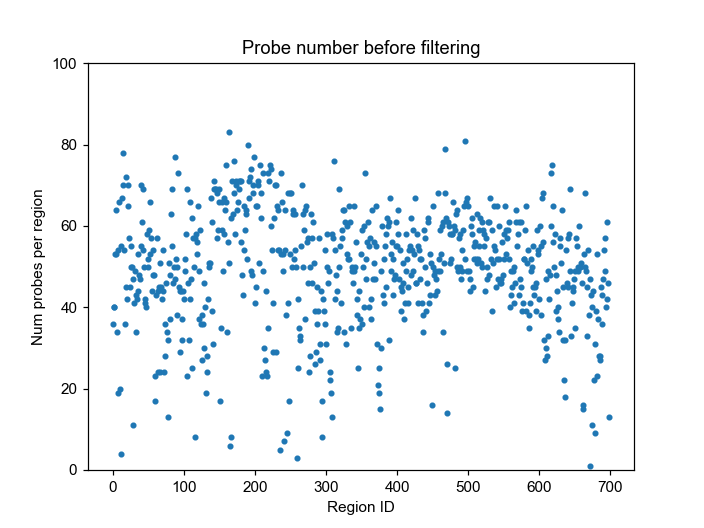

In [32]:
# number of probes histogram
fig, ax = plt.subplots()
ax.plot(cand_prob_nums, '.')
ax.set_ylabel("Num probes per region")
ax.set_xlabel("Region ID")
ax.set_title("Probe number before filtering")
ax.set_ylim([0,100])
plt.show()

In [33]:
# filter by genome counts
reload(library_tools.quality_check)

num_probes_kept = 80 # max num of probes kept for each region
filtered_pb_dict = library_tools.quality_check.Screen_probe_by_hit(library_folder, pb_dict, num_probes_kept,
                                                                  hit_type='genome')

## filter by minimum number of probes in each region
min_num_probes = 21
removed_regions = []
for _rid, _pb_class in filtered_pb_dict.items():
    if len(_pb_class.kept_probes) < min_num_probes:
        print(f"region: {_rid} removed with {len(_pb_class.kept_probes)} probes")
        removed_regions.append(_rid)
for _rid in removed_regions:
    del(filtered_pb_dict[_rid])

- Screen probes by genome counts.
-- filtering region:NRNX1-seg-1, directly append 36 probes
-- filtering region:NRNX1-seg-2, directly append 40 probes
-- filtering region:NRNX1-seg-3, directly append 40 probes
-- filtering region:NRNX1-seg-4, directly append 53 probes
-- filtering region:NRNX1-seg-5, directly append 64 probes
-- filtering region:NRNX1-seg-6, directly append 53 probes
-- filtering region:NRNX1-seg-7, directly append 34 probes
-- filtering region:NRNX1-seg-8, directly append 19 probes
-- filtering region:NRNX1-seg-9, directly append 54 probes
-- filtering region:NRNX1-seg-10, directly append 66 probes
-- filtering region:NRNX1-seg-11, directly append 20 probes
-- filtering region:NRNX1-seg-12, directly append 4 probes
-- filtering region:NRNX1-seg-13, directly append 55 probes
-- filtering region:NRNX1-seg-14, directly append 67 probes
-- filtering region:NRNX1-seg-15, directly append 78 probes
-- filtering region:NRNX1-seg-16, directly append 70 probes
-- filtering reg

In [34]:
len(pb_dict), len(filtered_pb_dict)

(699, 668)

<IPython.core.display.Javascript object>


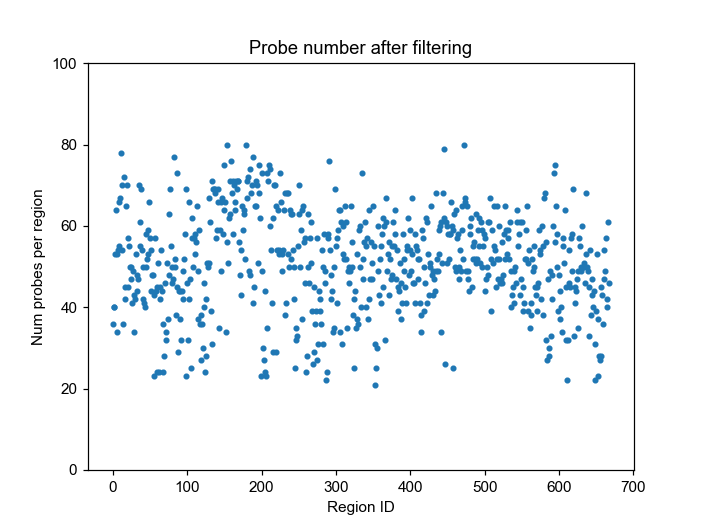

In [35]:
pb_num_dict = {_k:len(_v.kept_probes) for _k,_v in filtered_pb_dict.items()}

pb_nums = np.array(list(pb_num_dict.values()))
# number of probes histogram
fig, ax = plt.subplots()
ax.plot(pb_nums, '.')
ax.set_ylabel("Num probes per region")
ax.set_xlabel("Region ID")
ax.set_title("Probe number after filtering")
ax.set_ylim([0,100])
plt.show()

In [36]:
chr_2_region_savefile = os.path.join(library_folder, 'chr_2_final_region_num.pkl')
overwrite = True

filtered_reg_names = {}
for _reg, _pbde in filtered_pb_dict.items():
    if len(_pbde.kept_probes) > 0:
        filtered_reg_names[_reg] = list(_pbde.kept_probes.values())[0]['reg_name']

if not os.path.exists(chr_2_region_savefile) or overwrite:
    chr_2_region_num = {}
    for _reg, _info in filtered_reg_names.items():
        _chr = _info.split('_')[0].split(':')[0]
        if _chr not in chr_2_region_num:
            chr_2_region_num[_chr] = 1
        else:
            chr_2_region_num[_chr] += 1
    print(f"Saving into file: {chr_2_region_savefile}")

    pickle.dump(chr_2_region_num, open(chr_2_region_savefile, 'wb'))
else:
    print(f"loading from file: {chr_2_region_savefile}")
    chr_2_region_num = pickle.load(open(chr_2_region_savefile, 'rb'))

Saving into file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\chr_2_final_region_num.pkl


In [37]:
chr_2_region_num

{'2': 668}

In [38]:
#
reg_2_start = {}

for _name, _info in filtered_reg_names.items():
    _locus = _info.split('_')[0]
    _start,_end = _locus.split(':')[1].split('-')
    reg_2_start[_name] = int(_start)
#    
chr_2_region_names = {}

for _reg, _info in filtered_reg_names.items():
    _chr = _info.split('_')[0].split(':')[0]
    if _chr not in chr_2_region_names:
        chr_2_region_names[_chr] = [_reg]
    else:
        chr_2_region_names[_chr].append(_reg)
# sort
for _chr, _regs in chr_2_region_names.items():
    _sorted_regs = sorted(_regs, key=lambda _r: reg_2_start[_r])
    chr_2_region_names[_chr] = _sorted_regs
    
overwrite_region_names = True
chr_2_region_name_savefile = os.path.join(library_folder, 'chr_2_region_names.pkl')

if not os.path.exists(chr_2_region_name_savefile) or overwrite_region_names:
    print(f"Saving region names into file: {chr_2_region_name_savefile}")
    pickle.dump(chr_2_region_names, open(chr_2_region_name_savefile, 'wb'))

Saving region names into file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\chr_2_region_names.pkl


In [120]:
#
reg_2_start = {}

for _name, _info in filtered_reg_names.items():
    _locus = _info.split('_')[0]
    _start,_end = _locus.split(':')[1].split('-')
    reg_2_start[_name] = int(_start)
#    
chr_2_region_names = {}

for _reg, _info in filtered_reg_names.items():
    _chr = _info.split('_')[0].split(':')[0]
    if _chr not in chr_2_region_names:
        chr_2_region_names[_chr] = [_reg]
    else:
        chr_2_region_names[_chr].append(_reg)
# sort
for _chr, _regs in chr_2_region_names.items():
    _sorted_regs = sorted(_regs, key=lambda _r: reg_2_start[_r])
    chr_2_region_names[_chr] = _sorted_regs

In [123]:
overwrite_region_names = True
chr_2_region_name_savefile = os.path.join(library_folder, 'chr_2_region_names.pkl')

if not os.path.exists(chr_2_region_name_savefile) or overwrite_region_names:
    print(chr_2_region_name_savefile)
    pickle.dump(chr_2_region_names, open(chr_2_region_name_savefile, 'wb'))

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_genome_library\chr_2_region_names.pkl


In [40]:
list(list(filtered_pb_dict.values())[51].kept_probes.values())[0]

{'name': '2:48275000-48280000_strand_+_gene_NRNX1-seg-56_reg_55_pb_78',
 'reg_index': 55,
 'reg_name': '2:48275000-48280000_strand_+_gene_NRNX1-seg-56',
 'pb_index': 78,
 'strand': '+',
 'gc': 0.35714285714285715,
 'tm': 73.95448612289107,
 'map_genome': 38,
 'map_rep_genome': 0,
 'map_self_sequences': 26}

In [125]:
# clear memory
del(_pbde)
del(_pb_class)

<a id='3'></a>
# 3. Load and asssemble probes

<a id='3.1'></a>
## 3.1 design readout mapping dict (region_to_readout)

load directly from http://localhost:8889/notebooks/Chromatin_Analysis_Scripts/Library_design/CTP-10_Aire/CTP-10_Aire_introns_DNA-MERFISH.ipynb#3.3-assemble-probes

In [42]:
# summarize total readout usage
region_2_readout_dict = pickle.load(open(os.path.join(library_folder, 'region_2_readout.pkl'), 'rb'))
region_2_readout_dict = {str(_r):_bs for _r,_bs in region_2_readout_dict.items()}
len(region_2_readout_dict)

668

In [43]:
region_2_readout_dict

{'NRNX1-seg-1': ['c6', 'c10', 'c23'],
 'NRNX1-seg-2': ['c30', 'c34', 'c47'],
 'NRNX1-seg-3': ['c54', 'c58', 'c71'],
 'NRNX1-seg-4': ['c78', 'c82', 'c95'],
 'NRNX1-seg-5': ['c102', 'c106', 'c119'],
 'NRNX1-seg-6': ['c126', 'c130', 'c143'],
 'NRNX1-seg-7': ['c150', 'c154', 'c167'],
 'NRNX1-seg-9': ['c174', 'c178', 'c191'],
 'NRNX1-seg-10': ['c200', 'c205', 'c209'],
 'NRNX1-seg-13': ['c224', 'c229', 'c233'],
 'NRNX1-seg-14': ['c0', 'c11', 'c15'],
 'NRNX1-seg-15': ['c24', 'c35', 'c39'],
 'NRNX1-seg-16': ['c48', 'c59', 'c63'],
 'NRNX1-seg-17': ['c72', 'c83', 'c87'],
 'NRNX1-seg-18': ['c96', 'c107', 'c111'],
 'NRNX1-seg-19': ['c120', 'c131', 'c135'],
 'NRNX1-seg-20': ['c144', 'c155', 'c159'],
 'NRNX1-seg-21': ['c168', 'c179', 'c183'],
 'NRNX1-seg-22': ['c207', 'c208', 'c215'],
 'NRNX1-seg-23': ['c231', 'c232', 'c239'],
 'NRNX1-seg-24': ['c2', 'c7', 'c14'],
 'NRNX1-seg-25': ['c26', 'c31', 'c38'],
 'NRNX1-seg-26': ['c50', 'c55', 'c62'],
 'NRNX1-seg-27': ['c74', 'c79', 'c86'],
 'NRNX1-seg-28': 

<a id='3.2'></a>
## 3.2 loading components

### primers
pick primer set 0,1

In [45]:
from ImageAnalysis3 import library_tools
primer_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Primers'
primers = library_tools.assemble.load_primers([0,1], _primer_folder=primer_folder)

- Picked primer: ID: W1A01_primer_0
Name: W1A01_primer_0
Description: W1A01_primer_0
Number of features: 0
Seq('CGGCTCGCAGCGTGTAAACG')
- Picked primer: ID: W1A02_primer_1
Name: W1A02_primer_1
Description: W1A02_primer_1
Number of features: 0
Seq('TAATACGACTCACTATAGGGCATTTCAGGATCACCGGCGG')


### readouts

In [46]:
# collect types from region_2_readout_dict
readout_usage_by_type = {}
for _region, _infos in region_2_readout_dict.items():
    for _info in _infos:
        if _info[0] not in readout_usage_by_type:
            readout_usage_by_type[_info[0]] = []
        if int(_info[1:]) not in readout_usage_by_type[_info[0]]:
            readout_usage_by_type[_info[0]].append(int(_info[1:]))

readout_usage_dict = {_type:len(_v) for _type,_v in readout_usage_by_type.items()}

In [47]:
from ImageAnalysis3.classes import _allowed_kwds
reload(ia.library_tools.assemble)
readout_dict ={}
overwrite_readout_usage = True
readout_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\selected_NDB_sets'

# combo
readout_type = 'combo'
# 
_type_char = _allowed_kwds[readout_type]
_readout_start = 0
_num_color = 3

readout_dict[_type_char] = library_tools.assemble.load_readouts(readout_usage_dict[_type_char], 
                                                       _type='highest_snr', 
                                                       _readout_folder=readout_folder, 
                                                       _num_colors=_num_color, # 750,647,561
                                                       _start_id=_readout_start,
                                                       )

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\selected_NDB_sets\highest_snr_750.fasta
\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\selected_NDB_sets\highest_snr_647.fasta
\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\selected_NDB_sets\highest_snr_561.fasta
[80, 80, 80]


In [48]:
[_r.id for _r in readout_dict[_type_char]]

['NDB_784',
 'NDB_755',
 'NDB_759',
 'NDB_826',
 'NDB_578',
 'NDB_795',
 'NDB_376',
 'NDB_713',
 'NDB_777',
 'NDB_865',
 'NDB_533',
 'NDB_801',
 'NDB_817',
 'NDB_725',
 'NDB_807',
 'NDB_652',
 'NDB_710',
 'NDB_690',
 'NDB_718',
 'NDB_971',
 'NDB_699',
 'NDB_847',
 'NDB_743',
 'NDB_936',
 'NDB_643',
 'NDB_683',
 'NDB_456',
 'NDB_760',
 'NDB_815',
 'NDB_738',
 'NDB_400',
 'NDB_965',
 'NDB_750',
 'NDB_790',
 'NDB_464',
 'NDB_825',
 'NDB_778',
 'NDB_431',
 'NDB_768',
 'NDB_844',
 'NDB_554',
 'NDB_852',
 'NDB_961',
 'NDB_917',
 'NDB_762',
 'NDB_661',
 'NDB_728',
 'NDB_804',
 'NDB_568',
 'NDB_458',
 'NDB_915',
 'NDB_466',
 'NDB_974',
 'NDB_387',
 'NDB_511',
 'NDB_746',
 'NDB_621',
 'NDB_901',
 'NDB_875',
 'NDB_375',
 'NDB_487',
 'NDB_773',
 'NDB_516',
 'NDB_409',
 'NDB_812',
 'NDB_432',
 'NDB_571',
 'NDB_716',
 'NDB_786',
 'NDB_448',
 'NDB_860',
 'NDB_858',
 'NDB_868',
 'NDB_680',
 'NDB_957',
 'NDB_529',
 'NDB_443',
 'NDB_465',
 'NDB_508',
 'NDB_455',
 'NDB_489',
 'NDB_403',
 'NDB_470',
 'ND

In [50]:
# save
readout_usage_file = os.path.join(library_folder, 'readout_usage.pkl')
if not os.path.isfile(readout_usage_file) or overwrite_readout_usage:
    print('save readout usage dict')
    pickle.dump(readout_dict, open(readout_usage_file, 'wb'))

save readout usage dict


<a id='3.3'></a>
## 3.3 assemble probes

In [51]:
reload(library_tools.assemble)
from ImageAnalysis3.library_tools.assemble import Assemble_probes

# params
assemble_params = {
    'primer_len':20,
    'num_readout_per_probe':4, 
}

In [52]:
# run assembly
cand_probes, readout_summary = Assemble_probes(library_folder, filtered_pb_dict, 
                                               region_2_readout_dict, readout_dict, primers, 
                                               primer_len=assemble_params['primer_len'], 
                                               num_readout_per_probe=assemble_params['num_readout_per_probe'], 
                                               unique_readout_per_probe=True,
                                               rc_targets=False, overwrite=True)

- Assemble probes by given target sequences, readouts and primers.
-- included readout types: ['c']
--- assemblying 36 probes in region: NRNX1-seg-1
--- assemblying 40 probes in region: NRNX1-seg-2
--- assemblying 40 probes in region: NRNX1-seg-3
--- assemblying 53 probes in region: NRNX1-seg-4
--- assemblying 64 probes in region: NRNX1-seg-5
--- assemblying 53 probes in region: NRNX1-seg-6
--- assemblying 34 probes in region: NRNX1-seg-7
--- assemblying 54 probes in region: NRNX1-seg-9
--- assemblying 66 probes in region: NRNX1-seg-10
--- assemblying 55 probes in region: NRNX1-seg-13
--- assemblying 67 probes in region: NRNX1-seg-14
--- assemblying 78 probes in region: NRNX1-seg-15
--- assemblying 70 probes in region: NRNX1-seg-16
--- assemblying 54 probes in region: NRNX1-seg-17
--- assemblying 36 probes in region: NRNX1-seg-18
--- assemblying 72 probes in region: NRNX1-seg-19
--- assemblying 45 probes in region: NRNX1-seg-20
--- assemblying 42 probes in region: NRNX1-seg-21
--- asse

--- assemblying 56 probes in region: NRNX1-seg-183
--- assemblying 48 probes in region: NRNX1-seg-184
--- assemblying 43 probes in region: NRNX1-seg-185
--- assemblying 54 probes in region: NRNX1-seg-186
--- assemblying 65 probes in region: NRNX1-seg-187
--- assemblying 59 probes in region: NRNX1-seg-188
--- assemblying 63 probes in region: NRNX1-seg-189
--- assemblying 64 probes in region: NRNX1-seg-190
--- assemblying 52 probes in region: NRNX1-seg-191
--- assemblying 80 probes in region: NRNX1-seg-192
--- assemblying 71 probes in region: NRNX1-seg-193
--- assemblying 67 probes in region: NRNX1-seg-194
--- assemblying 72 probes in region: NRNX1-seg-195
--- assemblying 49 probes in region: NRNX1-seg-196
--- assemblying 74 probes in region: NRNX1-seg-197
--- assemblying 48 probes in region: NRNX1-seg-198
--- assemblying 68 probes in region: NRNX1-seg-199
--- assemblying 70 probes in region: NRNX1-seg-200
--- assemblying 77 probes in region: NRNX1-seg-201
--- assemblying 41 probes in re

--- assemblying 57 probes in region: NRNX1-seg-364
--- assemblying 37 probes in region: NRNX1-seg-365
--- assemblying 42 probes in region: NRNX1-seg-366
--- assemblying 64 probes in region: NRNX1-seg-367
--- assemblying 47 probes in region: NRNX1-seg-368
--- assemblying 56 probes in region: NRNX1-seg-369
--- assemblying 51 probes in region: NRNX1-seg-370
--- assemblying 47 probes in region: NRNX1-seg-371
--- assemblying 65 probes in region: NRNX1-seg-372
--- assemblying 55 probes in region: NRNX1-seg-373
--- assemblying 31 probes in region: NRNX1-seg-374
--- assemblying 21 probes in region: NRNX1-seg-375
--- assemblying 25 probes in region: NRNX1-seg-376
--- assemblying 30 probes in region: NRNX1-seg-379
--- assemblying 49 probes in region: NRNX1-seg-380
--- assemblying 60 probes in region: NRNX1-seg-381
--- assemblying 43 probes in region: NRNX1-seg-382
--- assemblying 52 probes in region: NRNX1-seg-383
--- assemblying 41 probes in region: NRNX1-seg-384
--- assemblying 55 probes in re

--- assemblying 51 probes in region: NRNX1-seg-537
--- assemblying 65 probes in region: NRNX1-seg-538
--- assemblying 55 probes in region: NRNX1-seg-539
--- assemblying 54 probes in region: NRNX1-seg-540
--- assemblying 45 probes in region: NRNX1-seg-541
--- assemblying 65 probes in region: NRNX1-seg-542
--- assemblying 52 probes in region: NRNX1-seg-543
--- assemblying 47 probes in region: NRNX1-seg-544
--- assemblying 60 probes in region: NRNX1-seg-545
--- assemblying 52 probes in region: NRNX1-seg-546
--- assemblying 46 probes in region: NRNX1-seg-547
--- assemblying 47 probes in region: NRNX1-seg-548
--- assemblying 46 probes in region: NRNX1-seg-549
--- assemblying 56 probes in region: NRNX1-seg-550
--- assemblying 48 probes in region: NRNX1-seg-551
--- assemblying 58 probes in region: NRNX1-seg-552
--- assemblying 52 probes in region: NRNX1-seg-553
--- assemblying 65 probes in region: NRNX1-seg-554
--- assemblying 59 probes in region: NRNX1-seg-555
--- assemblying 53 probes in re

# 4.Check quality


## 4.1 Load probes

Checking procedures could restart from here

In [53]:
# folder for this library
# biopython imports
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

# candidate full-length probe filename
candidate_basename = 'candidate_probes.fasta' # old version
# load full probes
full_records = []
with open(os.path.join(library_folder, candidate_basename), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        full_records.append(record)

print(f"Total probe loaded: {len(full_records)}")

Total probe loaded: 34068


### Manually input the following info to double check!

In [58]:
num_readout_per_probe = 4
primer_len=20
target_len=42
min_num_probes = 21
# merfish related
num_on_bits = 3

### 4.1.1 check primer usage

In [55]:
import ImageAnalysis3.library_tools.quality_check as check
reload(check)
primer_check = check._check_primer_usage(full_records, primers[0], primers[1], primer_len=primer_len)
print(primer_check)

-- Checking primer usage, total probes: 34068
True


### 4.1.2 check region probe number

In [59]:
reload(check)
reg_size_dic, len_check = check._check_region_size(full_records, 
                                                   min_size=min_num_probes)
print(len_check)

gene: NRNX1-seg-1 -> 36
gene: NRNX1-seg-2 -> 40
gene: NRNX1-seg-3 -> 40
gene: NRNX1-seg-4 -> 53
gene: NRNX1-seg-5 -> 64
gene: NRNX1-seg-6 -> 53
gene: NRNX1-seg-7 -> 34
gene: NRNX1-seg-9 -> 54
gene: NRNX1-seg-10 -> 66
gene: NRNX1-seg-13 -> 55
gene: NRNX1-seg-14 -> 67
gene: NRNX1-seg-15 -> 78
gene: NRNX1-seg-16 -> 70
gene: NRNX1-seg-17 -> 54
gene: NRNX1-seg-18 -> 36
gene: NRNX1-seg-19 -> 72
gene: NRNX1-seg-20 -> 45
gene: NRNX1-seg-21 -> 42
gene: NRNX1-seg-22 -> 65
gene: NRNX1-seg-23 -> 70
gene: NRNX1-seg-24 -> 57
gene: NRNX1-seg-25 -> 45
gene: NRNX1-seg-26 -> 55
gene: NRNX1-seg-27 -> 50
gene: NRNX1-seg-28 -> 50
gene: NRNX1-seg-30 -> 47
gene: NRNX1-seg-31 -> 41
gene: NRNX1-seg-32 -> 49
gene: NRNX1-seg-33 -> 34
gene: NRNX1-seg-34 -> 43
gene: NRNX1-seg-35 -> 42
gene: NRNX1-seg-36 -> 53
gene: NRNX1-seg-37 -> 44
gene: NRNX1-seg-38 -> 48
gene: NRNX1-seg-39 -> 47
gene: NRNX1-seg-40 -> 70
gene: NRNX1-seg-41 -> 55
gene: NRNX1-seg-42 -> 61
gene: NRNX1-seg-43 -> 69
gene: NRNX1-seg-44 -> 54
gene: NR

<IPython.core.display.Javascript object>


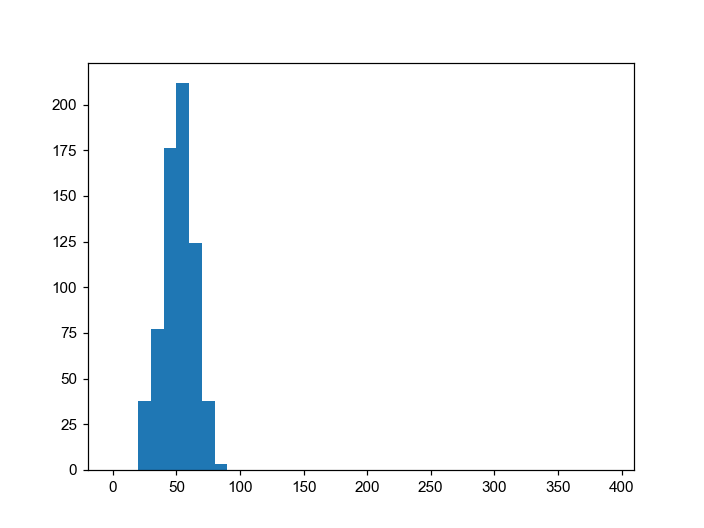

In [60]:
plt.figure()
plt.hist(list(reg_size_dic.values()), bins=np.arange(0,400,10))
plt.show()

### 4.1.3 check readout usage for each gene

In [61]:
reload(check)
check_readout_dict = pickle.load(open(os.path.join(library_folder, 'readout_usage.pkl'), 'rb'))

reg_readout_dic, reg2readout_check = check._check_region_to_readouts(full_records, check_readout_dict, 
                                                                     total_readout_num=num_on_bits)
print(reg2readout_check)

NRNX1-seg-1 -> ['NDB_376', 'NDB_533', 'NDB_936']
NRNX1-seg-2 -> ['NDB_400', 'NDB_464', 'NDB_804']
NRNX1-seg-3 -> ['NDB_511', 'NDB_875', 'NDB_858']
NRNX1-seg-4 -> ['NDB_508', 'NDB_470', 'NDB_438']
NRNX1-seg-5 -> ['NDB_883', 'NDB_461', 'NDB_789']
NRNX1-seg-6 -> ['NDB_427', 'NDB_506', 'NDB_1047']
NRNX1-seg-7 -> ['NDB_397', 'NDB_989', 'NDB_618']
NRNX1-seg-9 -> ['NDB_514', 'NDB_665', 'NDB_819']
NRNX1-seg-10 -> ['NDB_951', 'NDB_401', 'NDB_594']
NRNX1-seg-13 -> ['NDB_735', 'NDB_824', 'NDB_903']
NRNX1-seg-14 -> ['NDB_784', 'NDB_801', 'NDB_652']
NRNX1-seg-15 -> ['NDB_643', 'NDB_825', 'NDB_844']
NRNX1-seg-16 -> ['NDB_568', 'NDB_375', 'NDB_409']
NRNX1-seg-17 -> ['NDB_868', 'NDB_417', 'NDB_754']
NRNX1-seg-18 -> ['NDB_634', 'NDB_954', 'NDB_532']
NRNX1-seg-19 -> ['NDB_388', 'NDB_780', 'NDB_730']
NRNX1-seg-20 -> ['NDB_835', 'NDB_630', 'NDB_853']
NRNX1-seg-21 -> ['NDB_838', 'NDB_396', 'NDB_445']
NRNX1-seg-22 -> ['NDB_379', 'NDB_977', 'NDB_372']
NRNX1-seg-23 -> ['NDB_544', 'NDB_392', 'NDB_513']
NRNX1-s

### 4.1.4 check readout usage in the library

In [62]:
reload(check)
readout_reg_dic, readout2reg_check = check._check_readout_to_region(reg_readout_dic, full_records, 
                                                                    check_readout_dict, primer_len=primer_len, 
                                                                    target_len=target_len,
                                                                    probe_readout_num=num_readout_per_probe)
print(readout2reg_check)

-- extracting probes from >region:NRNX1-seg-1, region:NRNX1-seg-2, region:NRNX1-seg-3, region:NRNX1-seg-4, region:NRNX1-seg-5, region:NRNX1-seg-6, region:NRNX1-seg-7, region:NRNX1-seg-9, region:NRNX1-seg-10, region:NRNX1-seg-13, region:NRNX1-seg-14, region:NRNX1-seg-15, region:NRNX1-seg-16, region:NRNX1-seg-17, region:NRNX1-seg-18, region:NRNX1-seg-19, region:NRNX1-seg-20, region:NRNX1-seg-21, region:NRNX1-seg-22, region:NRNX1-seg-23, region:NRNX1-seg-24, region:NRNX1-seg-25, region:NRNX1-seg-26, region:NRNX1-seg-27, region:NRNX1-seg-28, region:NRNX1-seg-30, region:NRNX1-seg-31, region:NRNX1-seg-32, region:NRNX1-seg-33, region:NRNX1-seg-34, region:NRNX1-seg-35, region:NRNX1-seg-36, region:NRNX1-seg-37, region:NRNX1-seg-38, region:NRNX1-seg-39, region:NRNX1-seg-40, region:NRNX1-seg-41, region:NRNX1-seg-42, region:NRNX1-seg-43, region:NRNX1-seg-44, region:NRNX1-seg-45, region:NRNX1-seg-46, region:NRNX1-seg-47, region:NRNX1-seg-48, region:NRNX1-seg-49, region:NRNX1-seg-50, region:NRNX1-se

region:NRNX1-seg-411, region:NRNX1-seg-412, region:NRNX1-seg-413, region:NRNX1-seg-414, region:NRNX1-seg-415, region:NRNX1-seg-416, region:NRNX1-seg-417, region:NRNX1-seg-418, region:NRNX1-seg-419, region:NRNX1-seg-420, region:NRNX1-seg-421, region:NRNX1-seg-422, region:NRNX1-seg-423, region:NRNX1-seg-424, region:NRNX1-seg-425, region:NRNX1-seg-426, region:NRNX1-seg-427, region:NRNX1-seg-428, region:NRNX1-seg-429, region:NRNX1-seg-430, region:NRNX1-seg-431, region:NRNX1-seg-432, region:NRNX1-seg-433, region:NRNX1-seg-434, region:NRNX1-seg-435, region:NRNX1-seg-436, region:NRNX1-seg-437, region:NRNX1-seg-438, region:NRNX1-seg-439, region:NRNX1-seg-440, region:NRNX1-seg-441, region:NRNX1-seg-442, region:NRNX1-seg-443, region:NRNX1-seg-444, region:NRNX1-seg-445, region:NRNX1-seg-446, region:NRNX1-seg-447, region:NRNX1-seg-448, region:NRNX1-seg-449, region:NRNX1-seg-450, region:NRNX1-seg-452, region:NRNX1-seg-453, region:NRNX1-seg-454, region:NRNX1-seg-455, region:NRNX1-seg-456, region:NRN

### 4.1.5 check bewteen probes

In [63]:
# construct internal map
reload(check)
int_map = check._construct_internal_map(full_records, library_folder, save=False) 

In [64]:
# internal check probes
readout_count_dic, readout_count_check = check._check_readout_in_probes(readout_reg_dic, reg_size_dic, int_map, readout_dict)
print(readout_count_check)

True


In [65]:
# check between probes
kept_records, removed_count = check._check_between_probes(full_records, int_map, 
                                                          primer_len=primer_len, 
                                                          target_len=target_len)

--- Sequence:loc_2:50850000-50855000_gene_NRNX1-seg-571_pb_51_pos_4749_strand_+_readouts_[NDB_887_c,NDB_887_c,NDB_887_c,NDB_887_c]_primers_[W1A01_primer_0,W1A02_primer_1] got hits:103, dumped
-- total probes removed by internal screening: 1


In [148]:
# clear memory
del(int_map)

### 4.1.6 finish checking, save

In [66]:
print(len(kept_records), len(cand_probes))

34067 34068


In [67]:
# save kept records
with open(os.path.join(library_folder, 'filtered_full_probes.fasta'), 'w') as output_handle:
    SeqIO.write(kept_records, output_handle, "fasta")

## 4.2 BLAST screening of probes

create the local blast database by:
```bash
makeblastdb -in C:\Users\puzheng\Documents\Tools\lowercase_masked\Mus_musculus.GRCm38.dna_sm.merged.fa -dbtype nucl -parse_seqids -out GRCm38_ensembl -title "Mouse chromosomes soft masked" -blastdb_version 4![image.png](attachment:image.png)
```

The outputs are:
```bash
Building a new DB, current time: 03/30/2021 21:49:18
New DB name:   C:\Users\puzheng\Documents\Tools\GRCm38_ensembl
New DB title:  Mouse chromosomes soft masked
Sequence type: Nucleotide
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 66 sequences in 42.2668 seconds.
```

In [68]:
import ImageAnalysis3.library_tools.quality_check as check
reload(check)

<module 'ImageAnalysis3.library_tools.quality_check' from 'E:\\Users\\puzheng_new\\Documents\\Chromatin_Analysis_Scripts\\Library_design\\CTP-14-human_brain_genome\\..\\..\\..\\..\\Documents\\ImageAnalysis3\\library_tools\\quality_check.py'>

In [69]:
if 'kept_records' not in locals() or len(kept_records) == 0:
    kept_records = []
    with open(os.path.join(library_folder, 'filtered_full_probes.fasta'), 'r') as handle:
        for record in SeqIO.parse(handle, "fasta"):
            kept_records.append(record)
print(len(kept_records))

34067


In [71]:
blast_database = os.path.join(reference_folder, 'blast_database', 'hg38')

check.Blast_probes(kept_records, library_folder, num_threads=44, 
                   blast_db=blast_database, blast_evalue=100, overwrite=True)

- Blast probe against \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38\blast_database\hg38
-- number of probes loaded: 34067
-- processing region: NRNX1-seg-1 with 36 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-1.fasta
--- *blasting region: NRNX1-seg-1
--- total time for blast NRNX1-seg-1: 4.198s.
-- processing region: NRNX1-seg-10 with 66 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-10.fasta
--- *blasting region: NRNX1-seg-10
--- total time for blast NRNX1-seg-10: 5.124s.
-- processing region: NRNX1-seg-100 with 44 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-100.fasta
--- *blasting region: NRNX1-seg-100
--- total time for blast NRNX1-seg-100: 4.354s.
-- processing region: NRNX1-seg

--- total time for blast NRNX1-seg-128: 4.503s.
-- processing region: NRNX1-seg-129 with 30 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-129.fasta
--- *blasting region: NRNX1-seg-129
--- total time for blast NRNX1-seg-129: 2.776s.
-- processing region: NRNX1-seg-13 with 55 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-13.fasta
--- *blasting region: NRNX1-seg-13
--- total time for blast NRNX1-seg-13: 4.400s.
-- processing region: NRNX1-seg-130 with 46 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-130.fasta
--- *blasting region: NRNX1-seg-130
--- total time for blast NRNX1-seg-130: 3.228s.
-- processing region: NRNX1-seg-131 with 40 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\

--- total time for blast NRNX1-seg-158: 4.853s.
-- processing region: NRNX1-seg-159 with 58 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-159.fasta
--- *blasting region: NRNX1-seg-159
--- total time for blast NRNX1-seg-159: 4.523s.
-- processing region: NRNX1-seg-16 with 70 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-16.fasta
--- *blasting region: NRNX1-seg-16
--- total time for blast NRNX1-seg-16: 4.236s.
-- processing region: NRNX1-seg-160 with 64 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-160.fasta
--- *blasting region: NRNX1-seg-160
--- total time for blast NRNX1-seg-160: 5.216s.
-- processing region: NRNX1-seg-161 with 75 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\

--- total time for blast NRNX1-seg-187: 4.743s.
-- processing region: NRNX1-seg-188 with 59 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-188.fasta
--- *blasting region: NRNX1-seg-188
--- total time for blast NRNX1-seg-188: 3.971s.
-- processing region: NRNX1-seg-189 with 63 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-189.fasta
--- *blasting region: NRNX1-seg-189
--- total time for blast NRNX1-seg-189: 3.611s.
-- processing region: NRNX1-seg-19 with 72 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-19.fasta
--- *blasting region: NRNX1-seg-19
--- total time for blast NRNX1-seg-19: 4.646s.
-- processing region: NRNX1-seg-190 with 64 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\

--- total time for blast NRNX1-seg-213: 10.822s.
-- processing region: NRNX1-seg-214 with 73 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-214.fasta
--- *blasting region: NRNX1-seg-214
--- total time for blast NRNX1-seg-214: 5.849s.
-- processing region: NRNX1-seg-215 with 30 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-215.fasta
--- *blasting region: NRNX1-seg-215
--- total time for blast NRNX1-seg-215: 4.832s.
-- processing region: NRNX1-seg-216 with 27 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-216.fasta
--- *blasting region: NRNX1-seg-216
--- total time for blast NRNX1-seg-216: 5.235s.
-- processing region: NRNX1-seg-217 with 24 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libra

--- total time for blast NRNX1-seg-241: 3.398s.
-- processing region: NRNX1-seg-242 with 53 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-242.fasta
--- *blasting region: NRNX1-seg-242
--- total time for blast NRNX1-seg-242: 4.661s.
-- processing region: NRNX1-seg-244 with 54 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-244.fasta
--- *blasting region: NRNX1-seg-244
--- total time for blast NRNX1-seg-244: 4.257s.
-- processing region: NRNX1-seg-245 with 64 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-245.fasta
--- *blasting region: NRNX1-seg-245
--- total time for blast NRNX1-seg-245: 3.814s.
-- processing region: NRNX1-seg-246 with 38 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Librar

--- total time for blast NRNX1-seg-272: 4.316s.
-- processing region: NRNX1-seg-273 with 37 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-273.fasta
--- *blasting region: NRNX1-seg-273
--- total time for blast NRNX1-seg-273: 5.532s.
-- processing region: NRNX1-seg-274 with 65 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-274.fasta
--- *blasting region: NRNX1-seg-274
--- total time for blast NRNX1-seg-274: 3.964s.
-- processing region: NRNX1-seg-275 with 56 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-275.fasta
--- *blasting region: NRNX1-seg-275
--- total time for blast NRNX1-seg-275: 3.813s.
-- processing region: NRNX1-seg-276 with 57 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Librar

--- total time for blast NRNX1-seg-301: 3.728s.
-- processing region: NRNX1-seg-302 with 31 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-302.fasta
--- *blasting region: NRNX1-seg-302
--- total time for blast NRNX1-seg-302: 2.410s.
-- processing region: NRNX1-seg-303 with 50 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-303.fasta
--- *blasting region: NRNX1-seg-303
--- total time for blast NRNX1-seg-303: 3.574s.
-- processing region: NRNX1-seg-304 with 58 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-304.fasta
--- *blasting region: NRNX1-seg-304
--- total time for blast NRNX1-seg-304: 4.112s.
-- processing region: NRNX1-seg-305 with 46 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Librar

--- total time for blast NRNX1-seg-330: 3.532s.
-- processing region: NRNX1-seg-331 with 53 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-331.fasta
--- *blasting region: NRNX1-seg-331
--- total time for blast NRNX1-seg-331: 3.927s.
-- processing region: NRNX1-seg-332 with 60 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-332.fasta
--- *blasting region: NRNX1-seg-332
--- total time for blast NRNX1-seg-332: 5.004s.
-- processing region: NRNX1-seg-333 with 52 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-333.fasta
--- *blasting region: NRNX1-seg-333
--- total time for blast NRNX1-seg-333: 4.341s.
-- processing region: NRNX1-seg-334 with 65 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Librar

--- total time for blast NRNX1-seg-358: 3.639s.
-- processing region: NRNX1-seg-359 with 52 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-359.fasta
--- *blasting region: NRNX1-seg-359
--- total time for blast NRNX1-seg-359: 4.241s.
-- processing region: NRNX1-seg-36 with 53 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-36.fasta
--- *blasting region: NRNX1-seg-36
--- total time for blast NRNX1-seg-36: 5.209s.
-- processing region: NRNX1-seg-360 with 56 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-360.fasta
--- *blasting region: NRNX1-seg-360
--- total time for blast NRNX1-seg-360: 3.963s.
-- processing region: NRNX1-seg-361 with 61 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\

--- total time for blast NRNX1-seg-387: 5.168s.
-- processing region: NRNX1-seg-388 with 62 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-388.fasta
--- *blasting region: NRNX1-seg-388
--- total time for blast NRNX1-seg-388: 4.158s.
-- processing region: NRNX1-seg-389 with 60 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-389.fasta
--- *blasting region: NRNX1-seg-389
--- total time for blast NRNX1-seg-389: 4.423s.
-- processing region: NRNX1-seg-39 with 47 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-39.fasta
--- *blasting region: NRNX1-seg-39
--- total time for blast NRNX1-seg-39: 3.623s.
-- processing region: NRNX1-seg-390 with 32 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\

--- total time for blast NRNX1-seg-413: 4.485s.
-- processing region: NRNX1-seg-414 with 58 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-414.fasta
--- *blasting region: NRNX1-seg-414
--- total time for blast NRNX1-seg-414: 4.104s.
-- processing region: NRNX1-seg-415 with 49 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-415.fasta
--- *blasting region: NRNX1-seg-415
--- total time for blast NRNX1-seg-415: 4.232s.
-- processing region: NRNX1-seg-416 with 52 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-416.fasta
--- *blasting region: NRNX1-seg-416
--- total time for blast NRNX1-seg-416: 3.602s.
-- processing region: NRNX1-seg-417 with 45 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Librar

--- total time for blast NRNX1-seg-440: 11.107s.
-- processing region: NRNX1-seg-441 with 57 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-441.fasta
--- *blasting region: NRNX1-seg-441
--- total time for blast NRNX1-seg-441: 3.865s.
-- processing region: NRNX1-seg-442 with 50 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-442.fasta
--- *blasting region: NRNX1-seg-442
--- total time for blast NRNX1-seg-442: 4.617s.
-- processing region: NRNX1-seg-443 with 39 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-443.fasta
--- *blasting region: NRNX1-seg-443
--- total time for blast NRNX1-seg-443: 3.028s.
-- processing region: NRNX1-seg-444 with 46 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libra

--- total time for blast NRNX1-seg-469: 5.280s.
-- processing region: NRNX1-seg-47 with 41 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-47.fasta
--- *blasting region: NRNX1-seg-47
--- total time for blast NRNX1-seg-47: 3.260s.
-- processing region: NRNX1-seg-470 with 79 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-470.fasta
--- *blasting region: NRNX1-seg-470
--- total time for blast NRNX1-seg-470: 4.095s.
-- processing region: NRNX1-seg-471 with 62 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-471.fasta
--- *blasting region: NRNX1-seg-471
--- total time for blast NRNX1-seg-471: 3.534s.
-- processing region: NRNX1-seg-472 with 26 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\

--- total time for blast NRNX1-seg-497: 4.477s.
-- processing region: NRNX1-seg-498 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-498.fasta
--- *blasting region: NRNX1-seg-498
--- total time for blast NRNX1-seg-498: 4.499s.
-- processing region: NRNX1-seg-499 with 66 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-499.fasta
--- *blasting region: NRNX1-seg-499
--- total time for blast NRNX1-seg-499: 4.181s.
-- processing region: NRNX1-seg-5 with 64 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-5.fasta
--- *blasting region: NRNX1-seg-5
--- total time for blast NRNX1-seg-5: 4.293s.
-- processing region: NRNX1-seg-50 with 50 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-1

--- total time for blast NRNX1-seg-523: 4.938s.
-- processing region: NRNX1-seg-524 with 55 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-524.fasta
--- *blasting region: NRNX1-seg-524
--- total time for blast NRNX1-seg-524: 4.648s.
-- processing region: NRNX1-seg-525 with 58 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-525.fasta
--- *blasting region: NRNX1-seg-525
--- total time for blast NRNX1-seg-525: 4.124s.
-- processing region: NRNX1-seg-526 with 44 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-526.fasta
--- *blasting region: NRNX1-seg-526
--- total time for blast NRNX1-seg-526: 3.142s.
-- processing region: NRNX1-seg-527 with 57 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Librar

--- total time for blast NRNX1-seg-550: 3.650s.
-- processing region: NRNX1-seg-551 with 48 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-551.fasta
--- *blasting region: NRNX1-seg-551
--- total time for blast NRNX1-seg-551: 2.906s.
-- processing region: NRNX1-seg-552 with 58 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-552.fasta
--- *blasting region: NRNX1-seg-552
--- total time for blast NRNX1-seg-552: 4.188s.
-- processing region: NRNX1-seg-553 with 52 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-553.fasta
--- *blasting region: NRNX1-seg-553
--- total time for blast NRNX1-seg-553: 4.062s.
-- processing region: NRNX1-seg-554 with 65 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Librar

--- total time for blast NRNX1-seg-578: 3.155s.
-- processing region: NRNX1-seg-579 with 41 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-579.fasta
--- *blasting region: NRNX1-seg-579
--- total time for blast NRNX1-seg-579: 3.011s.
-- processing region: NRNX1-seg-58 with 48 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-58.fasta
--- *blasting region: NRNX1-seg-58
--- total time for blast NRNX1-seg-58: 4.958s.
-- processing region: NRNX1-seg-580 with 52 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-580.fasta
--- *blasting region: NRNX1-seg-580
--- total time for blast NRNX1-seg-580: 3.531s.
-- processing region: NRNX1-seg-581 with 52 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\

--- total time for blast NRNX1-seg-604: 6.430s.
-- processing region: NRNX1-seg-605 with 55 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-605.fasta
--- *blasting region: NRNX1-seg-605
--- total time for blast NRNX1-seg-605: 4.218s.
-- processing region: NRNX1-seg-606 with 67 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-606.fasta
--- *blasting region: NRNX1-seg-606
--- total time for blast NRNX1-seg-606: 3.543s.
-- processing region: NRNX1-seg-607 with 68 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-607.fasta
--- *blasting region: NRNX1-seg-607
--- total time for blast NRNX1-seg-607: 4.442s.
-- processing region: NRNX1-seg-608 with 56 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Librar

--- total time for blast NRNX1-seg-632: 3.630s.
-- processing region: NRNX1-seg-633 with 51 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-633.fasta
--- *blasting region: NRNX1-seg-633
--- total time for blast NRNX1-seg-633: 3.294s.
-- processing region: NRNX1-seg-634 with 64 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-634.fasta
--- *blasting region: NRNX1-seg-634
--- total time for blast NRNX1-seg-634: 5.327s.
-- processing region: NRNX1-seg-635 with 45 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-635.fasta
--- *blasting region: NRNX1-seg-635
--- total time for blast NRNX1-seg-635: 3.681s.
-- processing region: NRNX1-seg-636 with 32 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Librar

--- total time for blast NRNX1-seg-660: 3.856s.
-- processing region: NRNX1-seg-661 with 51 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-661.fasta
--- *blasting region: NRNX1-seg-661
--- total time for blast NRNX1-seg-661: 3.951s.
-- processing region: NRNX1-seg-662 with 46 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-662.fasta
--- *blasting region: NRNX1-seg-662
--- total time for blast NRNX1-seg-662: 3.830s.
-- processing region: NRNX1-seg-665 with 53 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-665.fasta
--- *blasting region: NRNX1-seg-665
--- total time for blast NRNX1-seg-665: 4.835s.
-- processing region: NRNX1-seg-666 with 68 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Librar

--- total time for blast NRNX1-seg-692: 3.738s.
-- processing region: NRNX1-seg-693 with 54 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-693.fasta
--- *blasting region: NRNX1-seg-693
--- total time for blast NRNX1-seg-693: 3.407s.
-- processing region: NRNX1-seg-694 with 49 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-694.fasta
--- *blasting region: NRNX1-seg-694
--- total time for blast NRNX1-seg-694: 5.311s.
-- processing region: NRNX1-seg-695 with 57 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-695.fasta
--- *blasting region: NRNX1-seg-695
--- total time for blast NRNX1-seg-695: 4.652s.
-- processing region: NRNX1-seg-696 with 40 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Librar

--- total time for blast NRNX1-seg-91: 3.394s.
-- processing region: NRNX1-seg-92 with 38 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-92.fasta
--- *blasting region: NRNX1-seg-92
--- total time for blast NRNX1-seg-92: 3.221s.
-- processing region: NRNX1-seg-93 with 73 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-93.fasta
--- *blasting region: NRNX1-seg-93
--- total time for blast NRNX1-seg-93: 4.483s.
-- processing region: NRNX1-seg-94 with 45 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\blast\probe_gene_NRNX1-seg-94.fasta
--- *blasting region: NRNX1-seg-94
--- total time for blast NRNX1-seg-94: 3.529s.
-- processing region: NRNX1-seg-95 with 29 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_hum

### 4.2.1 screen probe by blast results

This step has 2 different cutoffs:

hard_cutoff: whether a probe has any ~40mer hit somewhere else, if so just dump the probe

soft_cutoff: whether a probe has a lot of ~20mer off-target hits, if exceed certain amount then dump the probe

In [77]:
# screen
import ImageAnalysis3.library_tools.quality_check as check
reload(check)
num_probes_per_region = 60
kept_pbs, blast_keep_dic, hard_count_list, soft_count_list = check.Screening_Probes_by_Blast(library_folder, 
                                                                                             num_probes_per_region,
                                                                                             keep_mode='front',
                                                                                             hard_thres=target_len,
                                                                                             soft_count_th=50,
                                                                                             )

- Number of probes loaded: 34067
- Number of regions in this library: 668
-- checking probes in region: NRNX1-seg-1
--- gene=NRNX1-seg-1, id=6 removed by soft count = 240
--- gene=NRNX1-seg-1, id=8 removed by soft count = 135
--- number of probes: 36 , kept by blast: 34 , if remove dups: 34
-- number of probes kept for this region: 34
-- checking probes in region: NRNX1-seg-2
--- gene=NRNX1-seg-2, id=13 removed by soft count = 52
--- gene=NRNX1-seg-2, id=18 removed by soft count = 87
--- number of probes: 40 , kept by blast: 38 , if remove dups: 38
-- number of probes kept for this region: 38
-- checking probes in region: NRNX1-seg-3
--- gene=NRNX1-seg-3, id=0 removed by soft count = 68
--- gene=NRNX1-seg-3, id=1 removed by soft count = 102
--- gene=NRNX1-seg-3, id=22 removed by soft count = 215
--- gene=NRNX1-seg-3, id=27 removed by soft count = 349
--- number of probes: 40 , kept by blast: 36 , if remove dups: 36
-- number of probes kept for this region: 36
-- checking probes in regi

--- gene=NRNX1-seg-33, id=0 removed by soft count = 467
--- gene=NRNX1-seg-33, id=1 removed by soft count = 455
--- gene=NRNX1-seg-33, id=2 removed by soft count = 297
--- gene=NRNX1-seg-33, id=3 removed by soft count = 216
--- gene=NRNX1-seg-33, id=4 removed by soft count = 1573
--- number of probes: 34 , kept by blast: 29 , if remove dups: 29
-- number of probes kept for this region: 29
-- checking probes in region: NRNX1-seg-34
--- gene=NRNX1-seg-34, id=22 removed by soft count = 127
--- gene=NRNX1-seg-34, id=25 removed by soft count = 112
--- gene=NRNX1-seg-34, id=33 removed by soft count = 57
--- gene=NRNX1-seg-34, id=35 removed by soft count = 279
--- number of probes: 43 , kept by blast: 39 , if remove dups: 39
-- number of probes kept for this region: 39
-- checking probes in region: NRNX1-seg-35
--- gene=NRNX1-seg-35, id=28 removed by soft count = 178
--- number of probes: 42 , kept by blast: 41 , if remove dups: 41
-- number of probes kept for this region: 41
-- checking prob

--- gene=NRNX1-seg-58, id=31 removed by soft count = 724
--- gene=NRNX1-seg-58, id=35 removed by soft count = 90
--- gene=NRNX1-seg-58, id=39 removed by soft count = 109
--- number of probes: 48 , kept by blast: 42 , if remove dups: 42
-- number of probes kept for this region: 42
-- checking probes in region: NRNX1-seg-59
--- gene=NRNX1-seg-59, id=27 removed by soft count = 52
--- number of probes: 48 , kept by blast: 47 , if remove dups: 47
--- remove duplicated probes
-- number of probes kept for this region: 47
-- checking probes in region: NRNX1-seg-60
--- number of probes: 23 , kept by blast: 23 , if remove dups: 23
-- number of probes kept for this region: 23
-- checking probes in region: NRNX1-seg-62
--- number of probes: 43 , kept by blast: 43 , if remove dups: 43
-- number of probes kept for this region: 43
-- checking probes in region: NRNX1-seg-63
--- gene=NRNX1-seg-63, id=0 removed by soft count = 136
--- number of probes: 57 , kept by blast: 56 , if remove dups: 56
--- rem

--- number of probes: 52 , kept by blast: 52 , if remove dups: 52
--- remove duplicated probes
-- number of probes kept for this region: 52
-- checking probes in region: NRNX1-seg-91
--- number of probes: 50 , kept by blast: 50 , if remove dups: 50
--- remove duplicated probes
-- number of probes kept for this region: 50
-- checking probes in region: NRNX1-seg-92
--- gene=NRNX1-seg-92, id=0 removed by soft count = 109
--- number of probes: 38 , kept by blast: 37 , if remove dups: 37
-- number of probes kept for this region: 37
-- checking probes in region: NRNX1-seg-93
--- number of probes: 73 , kept by blast: 73 , if remove dups: 73
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: NRNX1-seg-94
--- gene=NRNX1-seg-94, id=24 removed by soft count = 61
--- gene=NRNX1-seg-94, id=36 removed by soft count = 94
--- number of probes: 45 , kept by blast: 43 , if remove dups: 43
-- number of probes kept for this 

--- gene=NRNX1-seg-123, id=8 removed by soft count = 90
--- gene=NRNX1-seg-123, id=36 removed by soft count = 3187
--- number of probes: 37 , kept by blast: 35 , if remove dups: 35
-- number of probes kept for this region: 35
-- checking probes in region: NRNX1-seg-124
--- gene=NRNX1-seg-124, id=18 removed by soft count = 213
--- number of probes: 59 , kept by blast: 58 , if remove dups: 58
--- remove duplicated probes
-- number of probes kept for this region: 58
-- checking probes in region: NRNX1-seg-125
--- number of probes: 36 , kept by blast: 36 , if remove dups: 36
-- number of probes kept for this region: 36
-- checking probes in region: NRNX1-seg-126
--- gene=NRNX1-seg-126, id=1 removed by soft count = 74
--- gene=NRNX1-seg-126, id=2 removed by soft count = 671
--- gene=NRNX1-seg-126, id=3 removed by soft count = 160
--- gene=NRNX1-seg-126, id=7 removed by soft count = 119
--- gene=NRNX1-seg-126, id=14 removed by soft count = 566
--- gene=NRNX1-seg-126, id=15 removed by soft co

--- number of probes: 35 , kept by blast: 32 , if remove dups: 32
-- number of probes kept for this region: 32
-- checking probes in region: NRNX1-seg-155
--- gene=NRNX1-seg-155, id=57 removed by soft count = 84
--- number of probes: 59 , kept by blast: 58 , if remove dups: 58
--- remove duplicated probes
-- number of probes kept for this region: 58
-- checking probes in region: NRNX1-seg-156
--- number of probes: 66 , kept by blast: 66 , if remove dups: 66
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: NRNX1-seg-157
--- gene=NRNX1-seg-157, id=2 removed by soft count = 174
--- gene=NRNX1-seg-157, id=35 removed by soft count = 58
--- gene=NRNX1-seg-157, id=36 removed by soft count = 404
--- gene=NRNX1-seg-157, id=38 removed by soft count = 341
--- gene=NRNX1-seg-157, id=39 removed by soft count = 55
--- gene=NRNX1-seg-157, id=40 removed by soft count = 57
--- gene=NRNX1-seg-157, id=41 removed by soft c

--- gene=NRNX1-seg-179, id=61 removed by soft count = 207
--- number of probes: 71 , kept by blast: 70 , if remove dups: 70
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: NRNX1-seg-180
--- gene=NRNX1-seg-180, id=51 removed by soft count = 60
--- number of probes: 69 , kept by blast: 68 , if remove dups: 68
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: NRNX1-seg-181
--- number of probes: 71 , kept by blast: 71 , if remove dups: 71
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: NRNX1-seg-182
--- number of probes: 71 , kept by blast: 71 , if remove dups: 71
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: NRNX1-seg-183
--- gene=NRNX1-seg-183, id=19 rem

--- gene=NRNX1-seg-212, id=10 removed by soft count = 525
--- gene=NRNX1-seg-212, id=13 removed by soft count = 64
--- gene=NRNX1-seg-212, id=14 removed by soft count = 1151
--- gene=NRNX1-seg-212, id=16 removed by soft count = 97
--- gene=NRNX1-seg-212, id=17 removed by soft count = 111
--- gene=NRNX1-seg-212, id=18 removed by soft count = 104
--- gene=NRNX1-seg-212, id=21 removed by soft count = 154
--- gene=NRNX1-seg-212, id=22 removed by soft count = 137
--- number of probes: 23 , kept by blast: 12 , if remove dups: 12
-- number of probes kept for this region: 12
-- checking probes in region: NRNX1-seg-213
--- gene=NRNX1-seg-213, id=1 removed by soft count = 80
--- gene=NRNX1-seg-213, id=21 removed by soft count = 510
--- gene=NRNX1-seg-213, id=22 removed by soft count = 310
--- gene=NRNX1-seg-213, id=25 removed by soft count = 1394
--- gene=NRNX1-seg-213, id=26 removed by soft count = 112
--- gene=NRNX1-seg-213, id=27 removed by soft count = 2533
--- number of probes: 49 , kept by

--- number of probes: 73 , kept by blast: 73 , if remove dups: 73
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: NRNX1-seg-240
--- number of probes: 66 , kept by blast: 66 , if remove dups: 66
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: NRNX1-seg-241
--- number of probes: 49 , kept by blast: 49 , if remove dups: 49
--- remove duplicated probes
-- number of probes kept for this region: 49
-- checking probes in region: NRNX1-seg-242
--- gene=NRNX1-seg-242, id=15 removed by soft count = 96
--- gene=NRNX1-seg-242, id=16 removed by soft count = 201
--- gene=NRNX1-seg-242, id=19 removed by soft count = 158
--- gene=NRNX1-seg-242, id=20 removed by soft count = 171
--- gene=NRNX1-seg-242, id=27 removed by soft count = 77
--- gene=NRNX1-seg-242, id=28 removed by soft count = 53
--- gene=NRNX1-seg-242, id=34 removed by soft

--- gene=NRNX1-seg-270, id=26 removed by soft count = 477
--- gene=NRNX1-seg-270, id=27 removed by soft count = 328
--- gene=NRNX1-seg-270, id=45 removed by soft count = 81
--- gene=NRNX1-seg-270, id=47 removed by soft count = 59
--- number of probes: 50 , kept by blast: 45 , if remove dups: 45
--- remove duplicated probes
-- number of probes kept for this region: 45
-- checking probes in region: NRNX1-seg-271
--- number of probes: 59 , kept by blast: 59 , if remove dups: 59
--- remove duplicated probes
-- number of probes kept for this region: 59
-- checking probes in region: NRNX1-seg-272
--- number of probes: 64 , kept by blast: 64 , if remove dups: 64
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: NRNX1-seg-273
--- gene=NRNX1-seg-273, id=26 removed by soft count = 1676
--- gene=NRNX1-seg-273, id=27 removed by soft count = 266
--- gene=NRNX1-seg-273, id=28 removed by soft count = 356
--- gene=NRNX1

--- gene=NRNX1-seg-294, id=0 removed by soft count = 299
--- gene=NRNX1-seg-294, id=1 removed by soft count = 155
--- gene=NRNX1-seg-294, id=2 removed by soft count = 422
--- gene=NRNX1-seg-294, id=3 removed by soft count = 707
--- gene=NRNX1-seg-294, id=6 removed by soft count = 69
--- gene=NRNX1-seg-294, id=7 removed by soft count = 194
--- gene=NRNX1-seg-294, id=8 removed by soft count = 860
--- gene=NRNX1-seg-294, id=10 removed by soft count = 113
--- gene=NRNX1-seg-294, id=11 removed by soft count = 449
--- gene=NRNX1-seg-294, id=15 removed by soft count = 334
--- gene=NRNX1-seg-294, id=30 removed by soft count = 71
--- number of probes: 31 , kept by blast: 20 , if remove dups: 20
-- number of probes kept for this region: 20
-- checking probes in region: NRNX1-seg-295
--- gene=NRNX1-seg-295, id=1 removed by soft count = 139
--- gene=NRNX1-seg-295, id=8 removed by soft count = 82
--- gene=NRNX1-seg-295, id=21 removed by soft count = 63
--- gene=NRNX1-seg-295, id=42 removed by soft 

--- gene=NRNX1-seg-320, id=19 removed by soft count = 84
--- gene=NRNX1-seg-320, id=20 removed by soft count = 120
--- number of probes: 50 , kept by blast: 48 , if remove dups: 48
--- remove duplicated probes
-- number of probes kept for this region: 48
-- checking probes in region: NRNX1-seg-321
--- number of probes: 69 , kept by blast: 69 , if remove dups: 69
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: NRNX1-seg-322
--- number of probes: 55 , kept by blast: 55 , if remove dups: 55
--- remove duplicated probes
-- number of probes kept for this region: 55
-- checking probes in region: NRNX1-seg-323
--- gene=NRNX1-seg-323, id=8 removed by soft count = 505
--- number of probes: 41 , kept by blast: 40 , if remove dups: 40
-- number of probes kept for this region: 40
-- checking probes in region: NRNX1-seg-324
--- number of probes: 57 , kept by blast: 57 , if remove dups: 57
--- remove duplicated prob

--- number of probes: 56 , kept by blast: 56 , if remove dups: 56
--- remove duplicated probes
-- number of probes kept for this region: 56
-- checking probes in region: NRNX1-seg-345
--- gene=NRNX1-seg-345, id=26 removed by soft count = 60
--- number of probes: 38 , kept by blast: 37 , if remove dups: 37
-- number of probes kept for this region: 37
-- checking probes in region: NRNX1-seg-346
--- gene=NRNX1-seg-346, id=14 removed by soft count = 874
--- gene=NRNX1-seg-346, id=34 removed by soft count = 2375
--- number of probes: 42 , kept by blast: 40 , if remove dups: 40
-- number of probes kept for this region: 40
-- checking probes in region: NRNX1-seg-347
--- gene=NRNX1-seg-347, id=4 removed by soft count = 468
--- gene=NRNX1-seg-347, id=6 removed by soft count = 56
--- gene=NRNX1-seg-347, id=7 removed by soft count = 247
--- gene=NRNX1-seg-347, id=12 removed by soft count = 876
--- gene=NRNX1-seg-347, id=13 removed by soft count = 2414
--- gene=NRNX1-seg-347, id=14 removed by soft

--- gene=NRNX1-seg-373, id=43 removed by soft count = 193
--- number of probes: 55 , kept by blast: 54 , if remove dups: 54
--- remove duplicated probes
-- number of probes kept for this region: 54
-- checking probes in region: NRNX1-seg-374
--- gene=NRNX1-seg-374, id=13 removed by soft count = 709
--- gene=NRNX1-seg-374, id=15 removed by soft count = 470
--- gene=NRNX1-seg-374, id=16 removed by soft count = 62
--- gene=NRNX1-seg-374, id=17 removed by soft count = 87
--- gene=NRNX1-seg-374, id=18 removed by soft count = 122
--- gene=NRNX1-seg-374, id=20 removed by soft count = 797
--- gene=NRNX1-seg-374, id=21 removed by soft count = 309
--- gene=NRNX1-seg-374, id=22 removed by soft count = 92
--- gene=NRNX1-seg-374, id=23 removed by soft count = 376
--- gene=NRNX1-seg-374, id=24 removed by soft count = 195
--- number of probes: 31 , kept by blast: 21 , if remove dups: 20
-- number of probes kept for this region: 21
-- checking probes in region: NRNX1-seg-375
--- gene=NRNX1-seg-375, id

--- number of probes: 58 , kept by blast: 56 , if remove dups: 56
--- remove duplicated probes
-- number of probes kept for this region: 56
-- checking probes in region: NRNX1-seg-405
--- number of probes: 47 , kept by blast: 47 , if remove dups: 47
--- remove duplicated probes
-- number of probes kept for this region: 47
-- checking probes in region: NRNX1-seg-406
--- gene=NRNX1-seg-406, id=26 removed by soft count = 2166
--- gene=NRNX1-seg-406, id=45 removed by soft count = 66
--- gene=NRNX1-seg-406, id=48 removed by soft count = 70
--- number of probes: 54 , kept by blast: 51 , if remove dups: 51
--- remove duplicated probes
-- number of probes kept for this region: 51
-- checking probes in region: NRNX1-seg-407
--- gene=NRNX1-seg-407, id=2 removed by soft count = 163
--- gene=NRNX1-seg-407, id=31 removed by soft count = 96
--- gene=NRNX1-seg-407, id=32 removed by soft count = 899
--- gene=NRNX1-seg-407, id=34 removed by soft count = 113
--- number of probes: 39 , kept by blast: 35 

--- number of probes: 38 , kept by blast: 38 , if remove dups: 38
-- number of probes kept for this region: 38
-- checking probes in region: NRNX1-seg-440
--- gene=NRNX1-seg-440, id=11 removed by soft count = 3361
--- gene=NRNX1-seg-440, id=13 removed by soft count = 7160
--- gene=NRNX1-seg-440, id=20 removed by soft count = 222
--- gene=NRNX1-seg-440, id=21 removed by soft count = 612
--- number of probes: 59 , kept by blast: 55 , if remove dups: 55
--- remove duplicated probes
-- number of probes kept for this region: 55
-- checking probes in region: NRNX1-seg-441
--- number of probes: 57 , kept by blast: 57 , if remove dups: 57
--- remove duplicated probes
-- number of probes kept for this region: 57
-- checking probes in region: NRNX1-seg-442
--- number of probes: 50 , kept by blast: 50 , if remove dups: 50
--- remove duplicated probes
-- number of probes kept for this region: 50
-- checking probes in region: NRNX1-seg-443
--- number of probes: 39 , kept by blast: 39 , if remove du

--- number of probes: 51 , kept by blast: 49 , if remove dups: 49
--- remove duplicated probes
-- number of probes kept for this region: 49
-- checking probes in region: NRNX1-seg-477
--- number of probes: 58 , kept by blast: 58 , if remove dups: 58
--- remove duplicated probes
-- number of probes kept for this region: 58
-- checking probes in region: NRNX1-seg-478
--- number of probes: 52 , kept by blast: 52 , if remove dups: 52
--- remove duplicated probes
-- number of probes kept for this region: 52
-- checking probes in region: NRNX1-seg-479
--- gene=NRNX1-seg-479, id=5 removed by soft count = 96
--- gene=NRNX1-seg-479, id=6 removed by soft count = 3877
--- number of probes: 58 , kept by blast: 56 , if remove dups: 56
--- remove duplicated probes
-- number of probes kept for this region: 56
-- checking probes in region: NRNX1-seg-480
--- number of probes: 58 , kept by blast: 58 , if remove dups: 58
--- remove duplicated probes
-- number of probes kept for this region: 58
-- checkin

--- number of probes: 52 , kept by blast: 52 , if remove dups: 52
--- remove duplicated probes
-- number of probes kept for this region: 52
-- checking probes in region: NRNX1-seg-514
--- gene=NRNX1-seg-514, id=42 removed by soft count = 2718
--- gene=NRNX1-seg-514, id=43 removed by soft count = 516
--- gene=NRNX1-seg-514, id=44 removed by soft count = 106
--- number of probes: 51 , kept by blast: 48 , if remove dups: 48
--- remove duplicated probes
-- number of probes kept for this region: 48
-- checking probes in region: NRNX1-seg-515
--- number of probes: 63 , kept by blast: 63 , if remove dups: 63
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: NRNX1-seg-516
--- gene=NRNX1-seg-516, id=46 removed by soft count = 3013
--- number of probes: 52 , kept by blast: 51 , if remove dups: 51
--- remove duplicated probes
-- number of probes kept for this region: 51
-- checking probes in region: NRNX1-seg-517
-

--- number of probes: 56 , kept by blast: 55 , if remove dups: 55
--- remove duplicated probes
-- number of probes kept for this region: 55
-- checking probes in region: NRNX1-seg-551
--- number of probes: 48 , kept by blast: 48 , if remove dups: 48
--- remove duplicated probes
-- number of probes kept for this region: 48
-- checking probes in region: NRNX1-seg-552
--- gene=NRNX1-seg-552, id=38 removed by soft count = 188
--- number of probes: 58 , kept by blast: 57 , if remove dups: 57
--- remove duplicated probes
-- number of probes kept for this region: 57
-- checking probes in region: NRNX1-seg-553
--- gene=NRNX1-seg-553, id=19 removed by soft count = 88
--- gene=NRNX1-seg-553, id=21 removed by soft count = 531
--- gene=NRNX1-seg-553, id=22 removed by soft count = 63
--- number of probes: 52 , kept by blast: 49 , if remove dups: 49
--- remove duplicated probes
-- number of probes kept for this region: 49
-- checking probes in region: NRNX1-seg-554
--- number of probes: 65 , kept by

--- number of probes: 39 , kept by blast: 39 , if remove dups: 39
-- number of probes kept for this region: 39
-- checking probes in region: NRNX1-seg-585
--- gene=NRNX1-seg-585, id=26 removed by soft count = 74
--- number of probes: 51 , kept by blast: 50 , if remove dups: 50
--- remove duplicated probes
-- number of probes kept for this region: 50
-- checking probes in region: NRNX1-seg-586
--- number of probes: 54 , kept by blast: 54 , if remove dups: 54
--- remove duplicated probes
-- number of probes kept for this region: 54
-- checking probes in region: NRNX1-seg-587
--- gene=NRNX1-seg-587, id=17 removed by soft count = 423
--- gene=NRNX1-seg-587, id=18 removed by soft count = 106
--- gene=NRNX1-seg-587, id=19 removed by soft count = 125
--- number of probes: 35 , kept by blast: 32 , if remove dups: 32
-- number of probes kept for this region: 32
-- checking probes in region: NRNX1-seg-588
--- gene=NRNX1-seg-588, id=3 removed by soft count = 57
--- gene=NRNX1-seg-588, id=26 remov

--- number of probes: 33 , kept by blast: 32 , if remove dups: 32
-- number of probes kept for this region: 32
-- checking probes in region: NRNX1-seg-616
--- gene=NRNX1-seg-616, id=7 removed by soft count = 194
--- gene=NRNX1-seg-616, id=8 removed by soft count = 1053
--- gene=NRNX1-seg-616, id=10 removed by soft count = 90
--- gene=NRNX1-seg-616, id=11 removed by soft count = 131
--- gene=NRNX1-seg-616, id=12 removed by soft count = 95
--- gene=NRNX1-seg-616, id=13 removed by soft count = 230
--- gene=NRNX1-seg-616, id=14 removed by soft count = 81
--- gene=NRNX1-seg-616, id=31 removed by soft count = 1573
--- gene=NRNX1-seg-616, id=32 removed by soft count = 289
--- number of probes: 42 , kept by blast: 33 , if remove dups: 33
-- number of probes kept for this region: 33
-- checking probes in region: NRNX1-seg-617
--- number of probes: 48 , kept by blast: 48 , if remove dups: 48
--- remove duplicated probes
-- number of probes kept for this region: 48
-- checking probes in region: N

--- gene=NRNX1-seg-637, id=0 removed by soft count = 89
--- gene=NRNX1-seg-637, id=3 removed by soft count = 402
--- gene=NRNX1-seg-637, id=4 removed by soft count = 52
--- gene=NRNX1-seg-637, id=5 removed by soft count = 1215
--- gene=NRNX1-seg-637, id=6 removed by soft count = 1773
--- gene=NRNX1-seg-637, id=7 removed by soft count = 109
--- gene=NRNX1-seg-637, id=8 removed by soft count = 364
--- gene=NRNX1-seg-637, id=9 removed by soft count = 1673
--- gene=NRNX1-seg-637, id=10 removed by soft count = 261
--- gene=NRNX1-seg-637, id=11 removed by soft count = 1587
--- gene=NRNX1-seg-637, id=12 removed by soft count = 167
--- number of probes: 22 , kept by blast: 11 , if remove dups: 11
-- number of probes kept for this region: 11
-- checking probes in region: NRNX1-seg-639
--- gene=NRNX1-seg-639, id=1 removed by soft count = 11025
--- gene=NRNX1-seg-639, id=2 removed by soft count = 285
--- gene=NRNX1-seg-639, id=4 removed by soft count = 117
--- gene=NRNX1-seg-639, id=6 removed by 

--- gene=NRNX1-seg-665, id=52 removed by soft count = 186
--- number of probes: 53 , kept by blast: 50 , if remove dups: 50
--- remove duplicated probes
-- number of probes kept for this region: 50
-- checking probes in region: NRNX1-seg-666
--- gene=NRNX1-seg-666, id=6 removed by soft count = 99
--- gene=NRNX1-seg-666, id=7 removed by soft count = 72
--- gene=NRNX1-seg-666, id=27 removed by soft count = 57
--- number of probes: 68 , kept by blast: 65 , if remove dups: 65
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: NRNX1-seg-667
--- number of probes: 50 , kept by blast: 50 , if remove dups: 50
--- remove duplicated probes
-- number of probes kept for this region: 50
-- checking probes in region: NRNX1-seg-668
--- number of probes: 49 , kept by blast: 49 , if remove dups: 49
--- remove duplicated probes
-- number of probes kept for this region: 49
-- checking probes in region: NRNX1-seg-669
--- numb

--- gene=NRNX1-seg-689, id=17 removed by soft count = 930
--- number of probes: 45 , kept by blast: 43 , if remove dups: 43
-- number of probes kept for this region: 43
-- checking probes in region: NRNX1-seg-690
--- number of probes: 43 , kept by blast: 43 , if remove dups: 43
-- number of probes kept for this region: 43
-- checking probes in region: NRNX1-seg-691
--- gene=NRNX1-seg-691, id=0 removed by soft count = 368
--- gene=NRNX1-seg-691, id=1 removed by soft count = 1447
--- gene=NRNX1-seg-691, id=2 removed by soft count = 295
--- gene=NRNX1-seg-691, id=3 removed by soft count = 151
--- gene=NRNX1-seg-691, id=4 removed by soft count = 1071
--- gene=NRNX1-seg-691, id=9 removed by soft count = 448
--- number of probes: 36 , kept by blast: 30 , if remove dups: 30
-- number of probes kept for this region: 30
-- checking probes in region: NRNX1-seg-692
--- gene=NRNX1-seg-692, id=0 removed by soft count = 271
--- gene=NRNX1-seg-692, id=1 removed by soft count = 138
--- gene=NRNX1-seg-

# 5. Summary Table and plots

In [83]:
blasted_records = []
with open(os.path.join(library_folder, 'blast_full_probes.fasta'), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        blasted_records.append(record)
print(len(blasted_records))

31808


In [84]:
import re

region_info_dict = {
    'gene_name':[],
    'locus_info':[],
    'chr':[],
    #'chr_order':[],
    'num_probes':[],
    'readouts': [],
    #'type':[],
}

probe_name_re_string = r'loc_(?P<loc>.+)_gene_(?P<gene>.+)_pb_(?P<pb>[0-9]+)_pos_(?P<pos>[0-9]+)(.+)_readouts_\[(?P<readouts>.+?)\]_primers_\[(?P<fwd_primers>.+?),(?P<rev_primers>.+?)\]'

for _pb in blasted_records:
    
    _match = re.match(probe_name_re_string, _pb.id, )
    # append all if not exist
    if _match.groupdict()['gene'] not in region_info_dict['gene_name']:
        # append new
        region_info_dict['gene_name'].append(_match.groupdict()['gene'])
        region_info_dict['locus_info'].append(_match.groupdict()['loc'])
        region_info_dict['chr'].append(_match.groupdict()['loc'].split(':')[0])
        region_info_dict['num_probes'].append(1)
        region_info_dict['readouts'].append(list(np.unique(_match.groupdict()['readouts'].split(','))))
    else:
        _ind = region_info_dict['gene_name'].index(_match.groupdict()['gene'])
        region_info_dict['num_probes'][_ind] += 1
        for _rd in np.unique(_match.groupdict()['readouts'].split(',')):
            if _rd not in region_info_dict['readouts'][_ind]:
                region_info_dict['readouts'][_ind].append(_rd)
        
    #break

In [85]:
import pandas as pd
region_info_df = pd.DataFrame(region_info_dict)
region_info_df

,gene_name,locus_info,chr,num_probes,readouts
0,NRNX1-seg-1,2:48000000-48005000,2,34,"[NDB_376_c, NDB_533_c, NDB_936_c]"
1,NRNX1-seg-2,2:48005000-48010000,2,38,"[NDB_400_c, NDB_464_c, NDB_804_c]"
2,NRNX1-seg-3,2:48010000-48015000,2,36,"[NDB_858_c, NDB_511_c, NDB_875_c]"
3,NRNX1-seg-4,2:48015000-48020000,2,50,"[NDB_508_c, NDB_470_c, NDB_438_c]"
4,NRNX1-seg-5,2:48020000-48025000,2,60,"[NDB_883_c, NDB_461_c, NDB_789_c]"
...,...,...,...,...,...
663,NRNX1-seg-695,2:51470000-51475000,2,53,"[NDB_754_c, NDB_698_c, NDB_438_c]"
664,NRNX1-seg-696,2:51475000-51480000,2,37,"[NDB_532_c, NDB_398_c, NDB_789_c]"
665,NRNX1-seg-697,2:51480000-51485000,2,40,"[NDB_730_c, NDB_752_c, NDB_1047_c]"
666,NRNX1-seg-698,2:51485000-51490000,2,57,"[NDB_853_c, NDB_899_c, NDB_618_c]"


In [86]:
# Add additional information
_types = []
for _g in region_info_df['gene_name']:
    if 'hSE-' in _g:
        _types.append('SE')
    elif 'enhancer-' in _g:
        _types.append('enhancer')
    else:
        _types.append('genome')
# add to this df
region_info_df['type'] = _types

region_info_df['chr_order'] = -1
for _chr in np.unique(region_info_df['chr']):
    _reg_starts = [int(_info.split(':')[1].split('-')[0])
                   for _info in region_info_df.loc[region_info_df['chr']==_chr,
                                                   'locus_info']
                  ]
    _reg_orders = np.array(_reg_starts).argsort().argsort().astype(np.int32)
    region_info_df.loc[region_info_df['chr']==_chr,'chr_order'] = _reg_orders

In [87]:
region_info_df

,gene_name,locus_info,chr,num_probes,readouts,type,chr_order
0,NRNX1-seg-1,2:48000000-48005000,2,34,"[NDB_376_c, NDB_533_c, NDB_936_c]",genome,0
1,NRNX1-seg-2,2:48005000-48010000,2,38,"[NDB_400_c, NDB_464_c, NDB_804_c]",genome,1
2,NRNX1-seg-3,2:48010000-48015000,2,36,"[NDB_858_c, NDB_511_c, NDB_875_c]",genome,2
3,NRNX1-seg-4,2:48015000-48020000,2,50,"[NDB_508_c, NDB_470_c, NDB_438_c]",genome,3
4,NRNX1-seg-5,2:48020000-48025000,2,60,"[NDB_883_c, NDB_461_c, NDB_789_c]",genome,4
...,...,...,...,...,...,...,...
663,NRNX1-seg-695,2:51470000-51475000,2,53,"[NDB_754_c, NDB_698_c, NDB_438_c]",genome,663
664,NRNX1-seg-696,2:51475000-51480000,2,37,"[NDB_532_c, NDB_398_c, NDB_789_c]",genome,664
665,NRNX1-seg-697,2:51480000-51485000,2,40,"[NDB_730_c, NDB_752_c, NDB_1047_c]",genome,665
666,NRNX1-seg-698,2:51485000-51490000,2,57,"[NDB_853_c, NDB_899_c, NDB_618_c]",genome,666


In [88]:
overwrite_region_info = True
region_info_filename = os.path.join(library_folder, r'summary_region_info.csv')

if not os.path.exists(region_info_filename) or overwrite_region_info:
    print(f"saving region info to file: {region_info_filename}")
    region_info_df.to_csv(region_info_filename, index=False)

saving region info to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\summary_region_info.csv


## Generate summary plots

In [ ]:
import ImageAnalysis3.library_tools.quality_check as check
# get region size dict
min_num_probes = 50
reg_size_dic, len_check = check._check_region_size(blasted_records, 
                                                   min_size=min_num_probes)
print(len_check)

In [ ]:
plt.style.use('default')
#plt.style.use('dark_background')

In [ ]:
# Plot number of probes per region
plt.figure(figsize=(6,3), dpi=100)
plt.plot(list(reg_size_dic.values()))
#plt.plot(np.ones(len(pb_nums))*20)
plt.ylabel(f"Num of probes", labelpad=1)
plt.xlabel(f"Region id", labelpad=1)
plt.ylim([0, np.max(list(reg_size_dic.values()))*1.1])
plt.savefig(os.path.join(report_folder, 'afterblast_nProbes_per_region.png'),
            transparent=True, dpi=300)
plt.show()

## number and location on each chr

In [ ]:
chrs = []
chr_2_centers = {}
chr_2_types = {}
for _loc_name, _type in zip(region_info_df['locus_info'], region_info_df['type']):
    _chr = _loc_name.split(':')[0]
    _start, _end = _loc_name.split(':')[1].split('-')
    _center = (int(_start)+int(_end))/2
    if _chr not in chrs:
        chrs.append(_chr)
    # create
    if _chr not in chr_2_centers:
        chr_2_centers[_chr] = []
        chr_2_types[_chr] = []
    # append
    if _center not in chr_2_centers[_chr]:
        chr_2_centers[_chr].append(_center)
        chr_2_types[_chr].append(_type)
# region number
chr_2_region_num = {_chr:len(cts) for _chr, cts in chr_2_centers.items()}

In [ ]:
# Load chromosome sizes
import pandas as pd
from ImageAnalysis3.structure_tools.distance import sort_chr

sorted_chrs = sorted(chrs, key=lambda _c: sort_chr(_c))

chrom_size_df = pd.read_csv(r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38\hg38.chrom.sizes',
            delimiter='\t', header=None)

chr_2_len = {}
for _chr in chrs:
    chr_2_len[_chr] = chrom_size_df.loc[chrom_size_df[0]==f'chr{_chr}', 1].values[0]


In [ ]:
%matplotlib inline
color_map = {
    'genome':'blue',
}
#plt.style.use('dark_background')
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(6,4),dpi=150)
for _i, _chr in enumerate(sorted_chrs):
    ax.hlines(_i, 0, chr_2_len[_chr], color='black', linewidth=1)
    ax.scatter(chr_2_centers[_chr], 
               np.ones(len(chr_2_centers[_chr]))* _i, 
               marker='+', linewidth=1,
               s=15, c=[color_map[_t] for _t in chr_2_types[_chr]],
               )
# create legend patch
legend_element = [Line2D([0],[0], color=[0,0,0,0], 
                         label=_type, marker='+', markersize=8,
                         markeredgecolor=_c, markerfacecolor=_c,)
                  for _type,_c in color_map.items()]
ax.legend(handles=legend_element)
ax.set_yticks(np.arange(len(sorted_chrs)))
ax.set_yticklabels(sorted_chrs)
#ax.set_xlim([0, chr_2_len['1']])
ax.set_xlabel("Genomic Location")
ax.set_ylabel("Chromosome")
#ax.legend([_sc])
plt.savefig(os.path.join(report_folder, 'target_location_summary.png'), 
            dpi=300, transparent=True)
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(6,4),dpi=150)
ax2 = ax1.twinx()
_bar_p = ax1.bar(sorted_chrs, 
                 [chr_2_region_num[_c] for _c in sorted_chrs], alpha=0.5)
ax1.set_ylabel("Num. of regions")
ax2.plot(sorted_chrs, [chr_2_len[_c] for _c in sorted_chrs], color='r')
ax2.set_ylim([0, np.max(list(chr_2_len.values()))*1.1])
ax2.set_ylabel("Chr size (bp)")
plt.savefig(os.path.join(report_folder, 'target_chr_stat_summary.png'), 
            dpi=300, transparent=True)
plt.show()

# Create count table

In [82]:
from ImageAnalysis3 import library_tools
from tqdm import tqdm
overwrite_table = False
# library
library_table_file = os.path.join(reference_folder, 'ctp14-NRNX1-tracing_17w.npy')

if not os.path.exists(library_table_file) or overwrite_table:
    # library
    _library_filenames = [os.path.join(library_folder, 'blast_full_probes.fasta')]
    print(len(_library_filenames))
    
    ct = library_tools.design.countTable(word=17,save_file=library_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_library_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=44) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()
    
    # clear RAM if contructed countable 
    del(ct)
else:
    print(f"reference table: {library_table_file} already exist, skip.")

1
- Start multi-processing comsume 31808 sequences 44 threads, finish in 16.891s
- Total sequences loaded: 4643968
Time to compute unique and clip: 1.302971601486206
Time to update matrix: 2.5318892002105713
- start saving to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38\ctp14-NRNX1-tracing_17w.npy


# Design corresponding sequential as validation

start from here

In [89]:
## load DNA-MERFISH count-table to select probes
library_table_file = os.path.join(reference_folder, 'ctp14-NRNX1-tracing_17w.npy')
if 'lib_table' not in locals():
    lib_table = library_tools.design.countTable(save_file=library_table_file, word=17)
    lib_table.load()

## select based on groups:

In [92]:
region_2_group_id = pickle.load(open(os.path.join(library_folder, 'region_2_group_id.pkl'), 'rb'))
group_2_regions = {}
for _r, _g in region_2_group_id.items():
    if _g not in group_2_regions:
        group_2_regions[_g] = [_r]
    else:
        group_2_regions[_g].append(_r)

In [97]:
# split blasted probes into genes
gene_2_probes = check.split_probe_by_gene(blasted_records,)

sel_sequential_pb_dict = {}
kept_group_th = 0.01 # percentage of regions that could be sequentially labeled
_library_hit_th = 14
_sequential_probe_num_th = 12

# for each group, check pb_dict
for _g, _region_names in group_2_regions.items():
    _sel_regions = []
    for _rname in _region_names:
        if _rname not in pb_dict:
            print(f"{_rname} doesn't exist.")
            continue
        # final probe num
        _final_probe_num = len(gene_2_probes[_rname])
        _design_probe_num = len(pb_dict[_rname].kept_probes)
        if _design_probe_num - _final_probe_num > 12:
            #print(_rname, _design_probe_num, _final_probe_num)
            _sel_regions.append(_rname)
    # check if all regions in this group have extra probes:
    print(_g, len(_sel_regions), len(_region_names))
    if len(_sel_regions) >= len(_region_names) * kept_group_th:
        #print(_g, len(_sel_regions), len(_region_names))
        # for probes in these regions, add to sel_sequential_pb_dict
        
        for _rname in _sel_regions:
            # collect used
            _used_pb_pos = [int(_r.id.split('pos_')[1].split('_')[0]) for _r in gene_2_probes[_rname]]
            # re-assemble kept_pbs for each region
            _kept_pbs = {}
            for _seq, _info in pb_dict[_rname].kept_probes.items():
                # map with multiplexed library
                _library_hits = lib_table.get(_seq)
                if _library_hits > _library_hit_th:
                    #print(_library_hits, '*')
                    continue
                if _info['pb_index'] not in _used_pb_pos:
                    _new_info = {_k:_v for _k,_v in _info.items()}
                    # add sequential tag
                    _new_info['reg_name'] = _new_info['reg_name'].replace('Chr7-6Mb-seg', 'Chr7-6Mb-sequential-seg')
                    # store group info_
                    _new_info['reg_name'] += f'_group_{_g}'
                    _new_info['group_id'] = _g
                    # map library
                    _new_info['map_library'] = _library_hits
                    # append
                    _kept_pbs[_seq] = _new_info
            if len(_kept_pbs) < _sequential_probe_num_th:
                continue
            #print(len(_kept_pbs))
            _splitted_pbde = library_tools.design.pb_reports_class()
            _splitted_pbde.kept_probes = _kept_pbs
            
            sel_sequential_pb_dict[_rname] = _splitted_pbde
            
print(len(sel_sequential_pb_dict))

0 3 67
1 4 67
2 3 67
3 1 67
4 4 67
5 4 67
6 2 67
7 1 67
8 3 66
9 3 66
28


## add sequential tag

In [98]:
num_readout_per_probe

4

In [99]:
sequential_region_2_readout_dict = {}
for _i, _reg in enumerate(sel_sequential_pb_dict):
    sequential_region_2_readout_dict[_reg] = [f"u{_i}"] * num_readout_per_probe
print(sequential_region_2_readout_dict)

{'NRNX1-seg-161': ['u0', 'u0', 'u0', 'u0'], 'NRNX1-seg-223': ['u1', 'u1', 'u1', 'u1'], 'NRNX1-seg-636': ['u2', 'u2', 'u2', 'u2'], 'NRNX1-seg-15': ['u3', 'u3', 'u3', 'u3'], 'NRNX1-seg-214': ['u4', 'u4', 'u4', 'u4'], 'NRNX1-seg-224': ['u5', 'u5', 'u5', 'u5'], 'NRNX1-seg-313': ['u6', 'u6', 'u6', 'u6'], 'NRNX1-seg-89': ['u7', 'u7', 'u7', 'u7'], 'NRNX1-seg-334': ['u8', 'u8', 'u8', 'u8'], 'NRNX1-seg-498': ['u9', 'u9', 'u9', 'u9'], 'NRNX1-seg-619': ['u10', 'u10', 'u10', 'u10'], 'NRNX1-seg-165': ['u11', 'u11', 'u11', 'u11'], 'NRNX1-seg-197': ['u12', 'u12', 'u12', 'u12'], 'NRNX1-seg-376': ['u13', 'u13', 'u13', 'u13'], 'NRNX1-seg-620': ['u14', 'u14', 'u14', 'u14'], 'NRNX1-seg-166': ['u15', 'u15', 'u15', 'u15'], 'NRNX1-seg-239': ['u16', 'u16', 'u16', 'u16'], 'NRNX1-seg-357': ['u17', 'u17', 'u17', 'u17'], 'NRNX1-seg-470': ['u18', 'u18', 'u18', 'u18'], 'NRNX1-seg-93': ['u19', 'u19', 'u19', 'u19'], 'NRNX1-seg-209': ['u20', 'u20', 'u20', 'u20'], 'NRNX1-seg-319': ['u21', 'u21', 'u21', 'u21'], 'NRNX1-s

## loading components

### primers doesn't change

### readouts

In [100]:
# collect types from region_2_readout_dict
sequential_readout_usage_by_type = {}
for _region, _infos in sequential_region_2_readout_dict.items():
    for _info in _infos:
        if _info[0] not in sequential_readout_usage_by_type:
            sequential_readout_usage_by_type[_info[0]] = []
        if int(_info[1:]) not in sequential_readout_usage_by_type[_info[0]]:
            sequential_readout_usage_by_type[_info[0]].append(int(_info[1:]))

readout_usage_dict = {_type:len(_v) for _type,_v in sequential_readout_usage_by_type.items()}

# collect types from region_2_readout_dict
sequential_readout_usage_dict = {}
for _region, _infos in sequential_region_2_readout_dict.items():
    for _info in _infos:
        if _info[0] not in sequential_readout_usage_by_type:
            sequential_readout_usage_by_type[_info[0]] = []
        if int(_info[1:]) not in sequential_readout_usage_by_type[_info[0]]:
            sequential_readout_usage_by_type[_info[0]].append(int(_info[1:]))

sequential_readout_usage_dict = {_type:len(_v) for _type,_v in sequential_readout_usage_by_type.items()}
sequential_readout_usage_dict

{'u': 28}

In [108]:
from ImageAnalysis3.classes import _allowed_kwds
reload(ia.library_tools.assemble)
sequential_readout_dict ={}
overwrite_readout_usage = True
readout_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\selected_NDB_sets'

# combo
readout_type = 'unique'
# 
_type_char = _allowed_kwds[readout_type]
_readout_start = 81
print(_readout_start)
_num_color = 3

sequential_readout_dict[_type_char] = library_tools.assemble.load_readouts(
    sequential_readout_usage_dict[_type_char], 
    _type='highest_snr_w_stv', 
    _readout_folder=readout_folder, 
    _num_colors=_num_color, # 750,647,561
    _start_id=_readout_start,
    )

81
\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\selected_NDB_sets\highest_snr_w_stv_750.fasta 175 81 10
\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\selected_NDB_sets\highest_snr_w_stv_647.fasta 174 81 10
\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\selected_NDB_sets\highest_snr_w_stv_561.fasta 180 81 10
[10, 10, 10]


In [109]:
sequential_readout_dict

{'u': [SeqRecord(seq=Seq('GACCTATCATTCGGGCTAGCAACTGCGATG'), id='NDB_940', name='NDB_940', description='NDB_940', dbxrefs=[]),
  SeqRecord(seq=Seq('ACCGAGTAACGTGTGATGACGGTGTACCCG'), id='NDB_581', name='NDB_581', description='NDB_581', dbxrefs=[]),
  SeqRecord(seq=Seq('GGCGTCGGTCAGATTTACGCTATTCAGGCC'), id='NDB_441', name='NDB_441', description='NDB_441', dbxrefs=[]),
  SeqRecord(seq=Seq('CCAATTATCGAAGTCGGTCGTTCTGACATA'), id='NDB_577', name='NDB_577', description='NDB_577', dbxrefs=[]),
  SeqRecord(seq=Seq('GCGTTGGACTTAAGTATTACGCCTGACGAC'), id='NDB_350', name='NDB_350', description='NDB_350', dbxrefs=[]),
  SeqRecord(seq=Seq('TCTCAAGTCGAGTCCTATGTAACCGTGCAG'), id='NDB_402', name='NDB_402', description='NDB_402', dbxrefs=[]),
  SeqRecord(seq=Seq('TAACACGAAGATCCATAGGCGACCTTTACT'), id='NDB_556', name='NDB_556', description='NDB_556', dbxrefs=[]),
  SeqRecord(seq=Seq('TAACTGAGCTTATCGCTTCGCACGAAATGG'), id='NDB_371', name='NDB_371', description='NDB_371', dbxrefs=[]),
  SeqRecord(seq=Seq('CTCATG

In [106]:
reload(library_tools.assemble)
from ImageAnalysis3.library_tools.assemble import Assemble_probes

# params
assemble_params = {
    'primer_len':20,
    'num_readout_per_probe':4, 
}
sequential_assemble_folder = os.path.join(library_folder, 'Sequential')
if not os.path.exists(sequential_assemble_folder):
    os.makedirs(sequential_assemble_folder)

In [107]:
# save
sequential_readout_usage_file = os.path.join(sequential_assemble_folder, 'sequential_readout_usage.pkl')
if not os.path.isfile(sequential_readout_usage_file) or overwrite_readout_usage:
    print('save sequential readout usage dict')
    pickle.dump(readout_dict, open(sequential_readout_usage_file, 'wb'))

save sequential readout usage dict


In [110]:
# run assembly

cand_sequential_probes, readout_summary = Assemble_probes(
    library_folder, sel_sequential_pb_dict, 
    sequential_region_2_readout_dict, sequential_readout_dict, 
    primers, 
    primer_len=assemble_params['primer_len'], 
    num_readout_per_probe=assemble_params['num_readout_per_probe'], 
    unique_readout_per_probe=True,
    save_folder=sequential_assemble_folder,
    rc_targets=False, overwrite=False)

- Assemble probes by given target sequences, readouts and primers.
-- included readout types: ['u']
--- assemblying 15 probes in region: NRNX1-seg-161
--- assemblying 15 probes in region: NRNX1-seg-223
--- assemblying 15 probes in region: NRNX1-seg-636
--- assemblying 18 probes in region: NRNX1-seg-15
--- assemblying 13 probes in region: NRNX1-seg-214
--- assemblying 14 probes in region: NRNX1-seg-224
--- assemblying 16 probes in region: NRNX1-seg-313
--- assemblying 17 probes in region: NRNX1-seg-89
--- assemblying 17 probes in region: NRNX1-seg-334
--- assemblying 21 probes in region: NRNX1-seg-498
--- assemblying 13 probes in region: NRNX1-seg-619
--- assemblying 23 probes in region: NRNX1-seg-165
--- assemblying 14 probes in region: NRNX1-seg-197
--- assemblying 13 probes in region: NRNX1-seg-376
--- assemblying 15 probes in region: NRNX1-seg-620
--- assemblying 24 probes in region: NRNX1-seg-166
--- assemblying 13 probes in region: NRNX1-seg-239
--- assemblying 13 probes in region

<IPython.core.display.Javascript object>


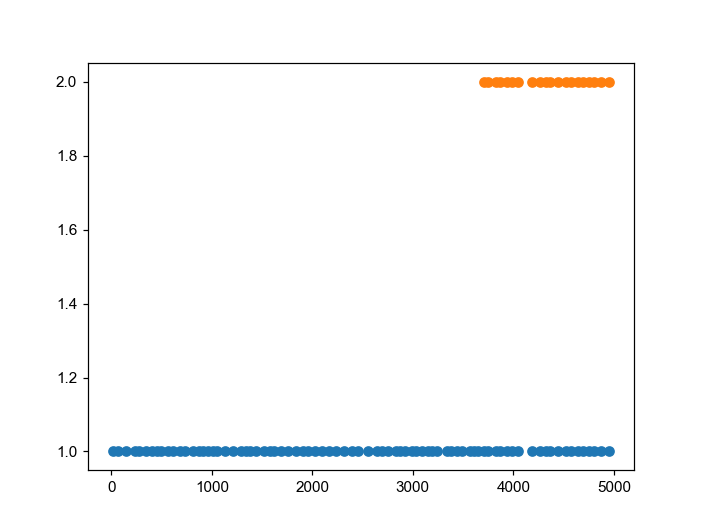

In [111]:
sel_region = 'NRNX1-seg-192'
plt.figure()
plt.scatter([int(_info['pb_index']) 
             for _info in pb_dict[sel_region].kept_probes.values()],
             np.ones(len(pb_dict[sel_region].kept_probes)))
plt.scatter([int(_info['pb_index']) 
             for _info in sel_sequential_pb_dict[sel_region].kept_probes.values()],
             2*np.ones(len(sel_sequential_pb_dict[sel_region].kept_probes)))

#plt.scatter([int(_p) for _p in genome_name_2_pb_pos['5']], 
#            2*np.ones(len(genome_name_2_pb_pos['5'])) )

In [112]:
reload(check)
reg_size_dic, len_check = check._check_region_size(cand_sequential_probes, 
                                                   species_marker = 'gene_',
                                                   min_size=12)
print(len_check)

gene: NRNX1-seg-161 -> 15
gene: NRNX1-seg-223 -> 15
gene: NRNX1-seg-636 -> 15
gene: NRNX1-seg-15 -> 18
gene: NRNX1-seg-214 -> 13
gene: NRNX1-seg-224 -> 14
gene: NRNX1-seg-313 -> 16
gene: NRNX1-seg-89 -> 17
gene: NRNX1-seg-334 -> 17
gene: NRNX1-seg-498 -> 21
gene: NRNX1-seg-619 -> 13
gene: NRNX1-seg-165 -> 23
gene: NRNX1-seg-197 -> 14
gene: NRNX1-seg-376 -> 13
gene: NRNX1-seg-620 -> 15
gene: NRNX1-seg-166 -> 24
gene: NRNX1-seg-239 -> 13
gene: NRNX1-seg-357 -> 13
gene: NRNX1-seg-470 -> 19
gene: NRNX1-seg-93 -> 13
gene: NRNX1-seg-209 -> 15
gene: NRNX1-seg-319 -> 13
gene: NRNX1-seg-201 -> 17
gene: NRNX1-seg-221 -> 13
gene: NRNX1-seg-679 -> 14
gene: NRNX1-seg-172 -> 16
gene: NRNX1-seg-192 -> 20
gene: NRNX1-seg-625 -> 20
True


In [113]:
# check these probes with int_map

kept_probes = library_tools.quality_check._check_between_probes(cand_sequential_probes, lib_table,
                                                  primer_len=primer_len, 
                                                  target_len=target_len)

-- total probes removed by internal screening: 0


## Blast cand_sequential_probes

In [117]:
blast_database = os.path.join(reference_folder, 'blast_database', 'hg38')

check.Blast_probes(cand_sequential_probes, sequential_assemble_folder, 
                   blast_subfolder='blast_sequential',
                   num_threads=44, 
                   blast_db=blast_database, blast_evalue=100, overwrite=True)

- Blast probe against \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38\blast_database\hg38
-- number of probes loaded: 449
-- processing region: NRNX1-seg-15 with 18 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\Sequential\blast_sequential\probe_gene_NRNX1-seg-15.fasta
--- *blasting region: NRNX1-seg-15
--- total time for blast NRNX1-seg-15: 2.314s.
-- processing region: NRNX1-seg-161 with 15 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\Sequential\blast_sequential\probe_gene_NRNX1-seg-161.fasta
--- *blasting region: NRNX1-seg-161
--- total time for blast NRNX1-seg-161: 1.421s.
-- processing region: NRNX1-seg-165 with 23 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_NRNX1_5kb\Sequential\blast_sequential\probe_gene_NRNX1-seg-165.fasta
--- *blasting region: NRNX1-seg-165
--- tot

--- total time for blast NRNX1-seg-93: 1.522s.


In [118]:
# screen
import ImageAnalysis3.library_tools.quality_check as qc
reload(check)
num_probes_per_region = 25
kept_pbs, blast_keep_dic, hard_count_list, soft_count_list = qc.Screening_Probes_by_Blast(
    sequential_assemble_folder, 
    num_probes_per_region,
    probe_filename='candidate_probes.fasta',
    blast_subfolder='blast_sequential',
    keep_mode='end',
    hard_thres=target_len,
    soft_count_th=50,
    save_filename='blast_sequential_full_probes.fasta',
    )

- Number of probes loaded: 449
- Number of regions in this library: 28
-- checking probes in region: NRNX1-seg-161
--- number of probes: 15 , kept by blast: 15 , if remove dups: 15
-- number of probes kept for this region: 15
-- checking probes in region: NRNX1-seg-223
--- number of probes: 15 , kept by blast: 15 , if remove dups: 15
-- number of probes kept for this region: 15
-- checking probes in region: NRNX1-seg-636
--- gene=NRNX1-seg-636, id=0 removed by soft count = 60
--- gene=NRNX1-seg-636, id=1 removed by soft count = 203
--- gene=NRNX1-seg-636, id=2 removed by soft count = 205
--- gene=NRNX1-seg-636, id=3 removed by soft count = 371
--- gene=NRNX1-seg-636, id=4 removed by soft count = 273
--- gene=NRNX1-seg-636, id=5 removed by soft count = 208
--- gene=NRNX1-seg-636, id=6 removed by soft count = 200
--- gene=NRNX1-seg-636, id=7 removed by soft count = 234
--- gene=NRNX1-seg-636, id=8 removed by soft count = 224
--- gene=NRNX1-seg-636, id=9 removed by soft count = 83
--- gen

E:\Users\puzheng_new\Documents\Chromatin_Analysis_Scripts\Library_design\CTP-14-human_brain_genome\..\..\..\..\Documents\ImageAnalysis3\library_tools\quality_check.py:578: RuntimeWarning: invalid value encountered in true_divide
  if sum(_keep_dic[_reg] * (_hard_cts == 1)) / float(sum(_keep_dic[_reg])) >= smallest_region_ratio and sum(_keep_dic[_reg]) >= smallest_region_ratio*probe_per_region:


--- number of probes: 13 , kept by blast: 13 , if remove dups: 13
-- number of probes kept for this region: 13
-- checking probes in region: NRNX1-seg-224
--- gene=NRNX1-seg-224, id=0 removed by soft count = 91
--- gene=NRNX1-seg-224, id=1 removed by soft count = 64
--- gene=NRNX1-seg-224, id=2 removed by soft count = 92
--- number of probes: 14 , kept by blast: 11 , if remove dups: 11
-- number of probes kept for this region: 11
-- checking probes in region: NRNX1-seg-313
--- number of probes: 16 , kept by blast: 16 , if remove dups: 16
-- number of probes kept for this region: 16
-- checking probes in region: NRNX1-seg-89
--- number of probes: 17 , kept by blast: 17 , if remove dups: 17
-- number of probes kept for this region: 17
-- checking probes in region: NRNX1-seg-334
--- gene=NRNX1-seg-334, id=0 removed by soft count = 141
--- gene=NRNX1-seg-334, id=1 removed by soft count = 188
--- gene=NRNX1-seg-334, id=3 removed by soft count = 90
--- gene=NRNX1-seg-334, id=4 removed by sof

--- gene=NRNX1-seg-625, id=1 removed by soft count = 375
--- gene=NRNX1-seg-625, id=3 removed by soft count = 443
--- gene=NRNX1-seg-625, id=4 removed by soft count = 249
--- gene=NRNX1-seg-625, id=5 removed by soft count = 412
--- gene=NRNX1-seg-625, id=6 removed by soft count = 304
--- gene=NRNX1-seg-625, id=7 removed by soft count = 335
--- gene=NRNX1-seg-625, id=8 removed by soft count = 99
--- gene=NRNX1-seg-625, id=9 removed by soft count = 140
--- gene=NRNX1-seg-625, id=10 removed by soft count = 320
--- gene=NRNX1-seg-625, id=11 removed by soft count = 463
--- gene=NRNX1-seg-625, id=12 removed by soft count = 515
--- gene=NRNX1-seg-625, id=13 removed by soft count = 161
--- gene=NRNX1-seg-625, id=14 removed by soft count = 209
--- gene=NRNX1-seg-625, id=15 removed by soft count = 68
--- gene=NRNX1-seg-625, id=16 removed by soft count = 460
--- gene=NRNX1-seg-625, id=17 removed by soft count = 134
--- gene=NRNX1-seg-625, id=18 removed by soft count = 390
--- gene=NRNX1-seg-625, 

<IPython.core.display.Javascript object>


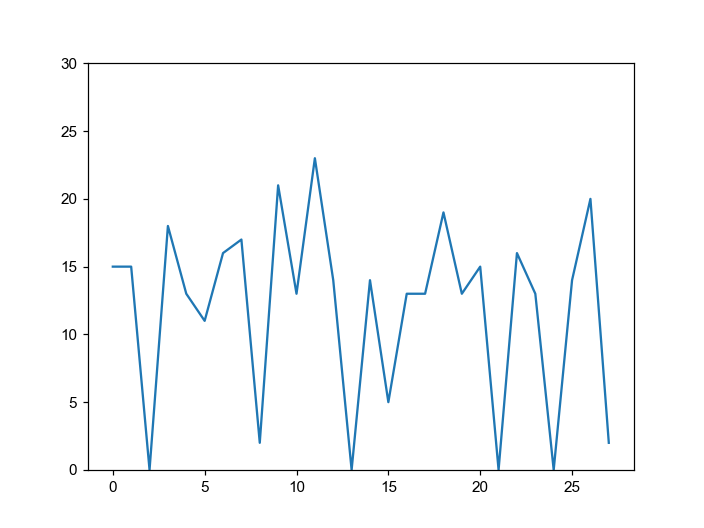

In [119]:
fig, ax = plt.subplots()
ax.plot([np.sum(_flg) for _flg in blast_keep_dic.values()])
ax.set_ylim([0,30])
fig.show()